# Capstone Project - Credit Card Fraud Detection
<br>
- The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

### Importing and Understanding Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
main_df = pd.read_csv('creditcard.csv')
main_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- We are aware of the fact that data set has also been modified with Principal Component Analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value 1 in cases of fraud and 0 in others.

### Data Quality Check and EDA

In [3]:
main_df.shape

(284807, 31)

In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
100*(main_df.isnull().sum()/len(main_df.index))

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

- We can see that on the initial inspection of the data frame we can see that there are no missing values, we will look at each variable deeply when we are checking for the skewdness.

- Also, doing Univariate or Bivariate analysis on the already PCA transformed data doesnt give us any information. However we can try doing some Univariate and Bivariate Analysis for variables Amount and Class.

- We can also note that here the variable Time contains the seconds elapsed between the first transaction in the data set and the subsequent transactions.  Hence it is absolutely unecessary to include this vaariable for our modeling. We can hence remove this.

In [6]:
main_df.drop(['Time'],axis=1,inplace=True)
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26       284807 non-null float64
V27  

#### Univariate  and Bivariate Analysis on Class and Amount.

- We will first observe the distribution of our classes.

In [7]:
classes=main_df['Class'].value_counts()
normal_share=classes[0]/main_df['Class'].count()*100
fraud_share=classes[1]/main_df['Class'].count()*100
normal_share

99.82725143693798

In [8]:
fraud_share

0.1727485630620034

- As we can see the this data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. This is because the number of frauds is comparitively less to the total number of credit card transactions in real time. We will have to treat this and check if the model performs any better than on the imbalanced data.

- We now check for the spread of Amount.

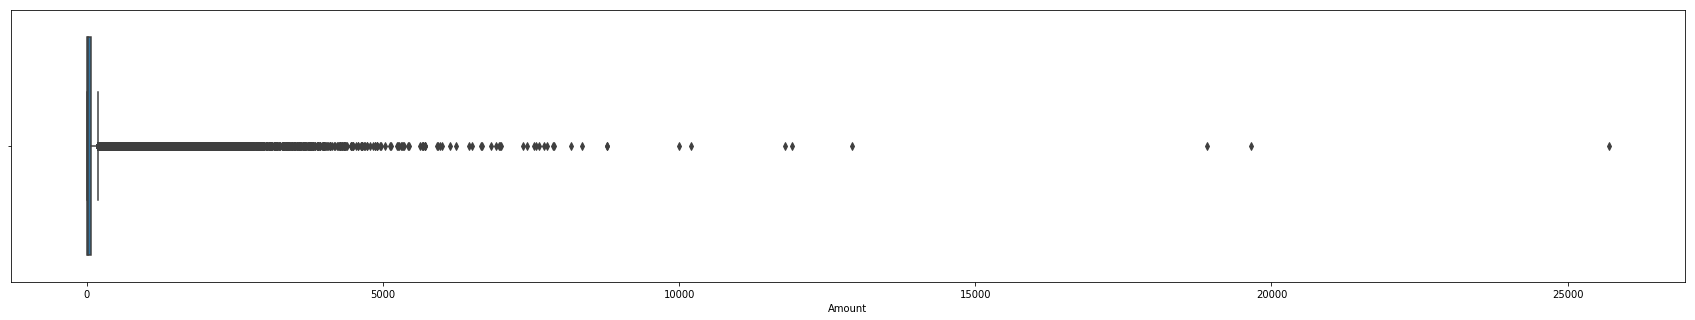

In [9]:
plt.figure(figsize=(30, 5))
sns.boxplot(x = 'Amount', data = main_df)

- In the boxplot though we can see many outliers imputing them would casue distorsions in our model as they are all real time transactions by individuals over time though a majority of them are focused below 5000.
- We can check how Amount is distributed over various percentiles.

In [10]:
main_df['Amount'].describe(percentiles=[.25,.5,.75,.90,.95,.99,.995])

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
90%         203.000000
95%         365.000000
99%        1017.970000
99.5%      1456.987700
max       25691.160000
Name: Amount, dtype: float64

- From the distribution shown above, we can see that there is a gradual increase in the data. Also there are no negetive amounts.
- We can see try noticing the spread of amount for both the classes by performing a Bivariate Analysis of both these variables. 

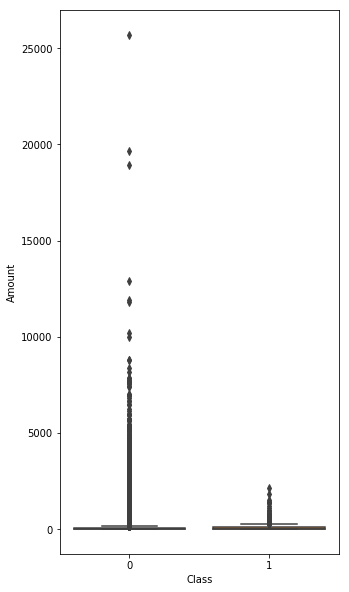

In [11]:
plt.figure(figsize=(5, 10))
sns.boxplot(y = 'Amount',x='Class', data = main_df)

- As we can see we can not notice any distint amounts for fraudulent transactions in the box plot.

#### Skewdness check of each of the transformed variables.
- We can proceed to check for the skewdness of each of the transformed variables using a histogram(distplot).

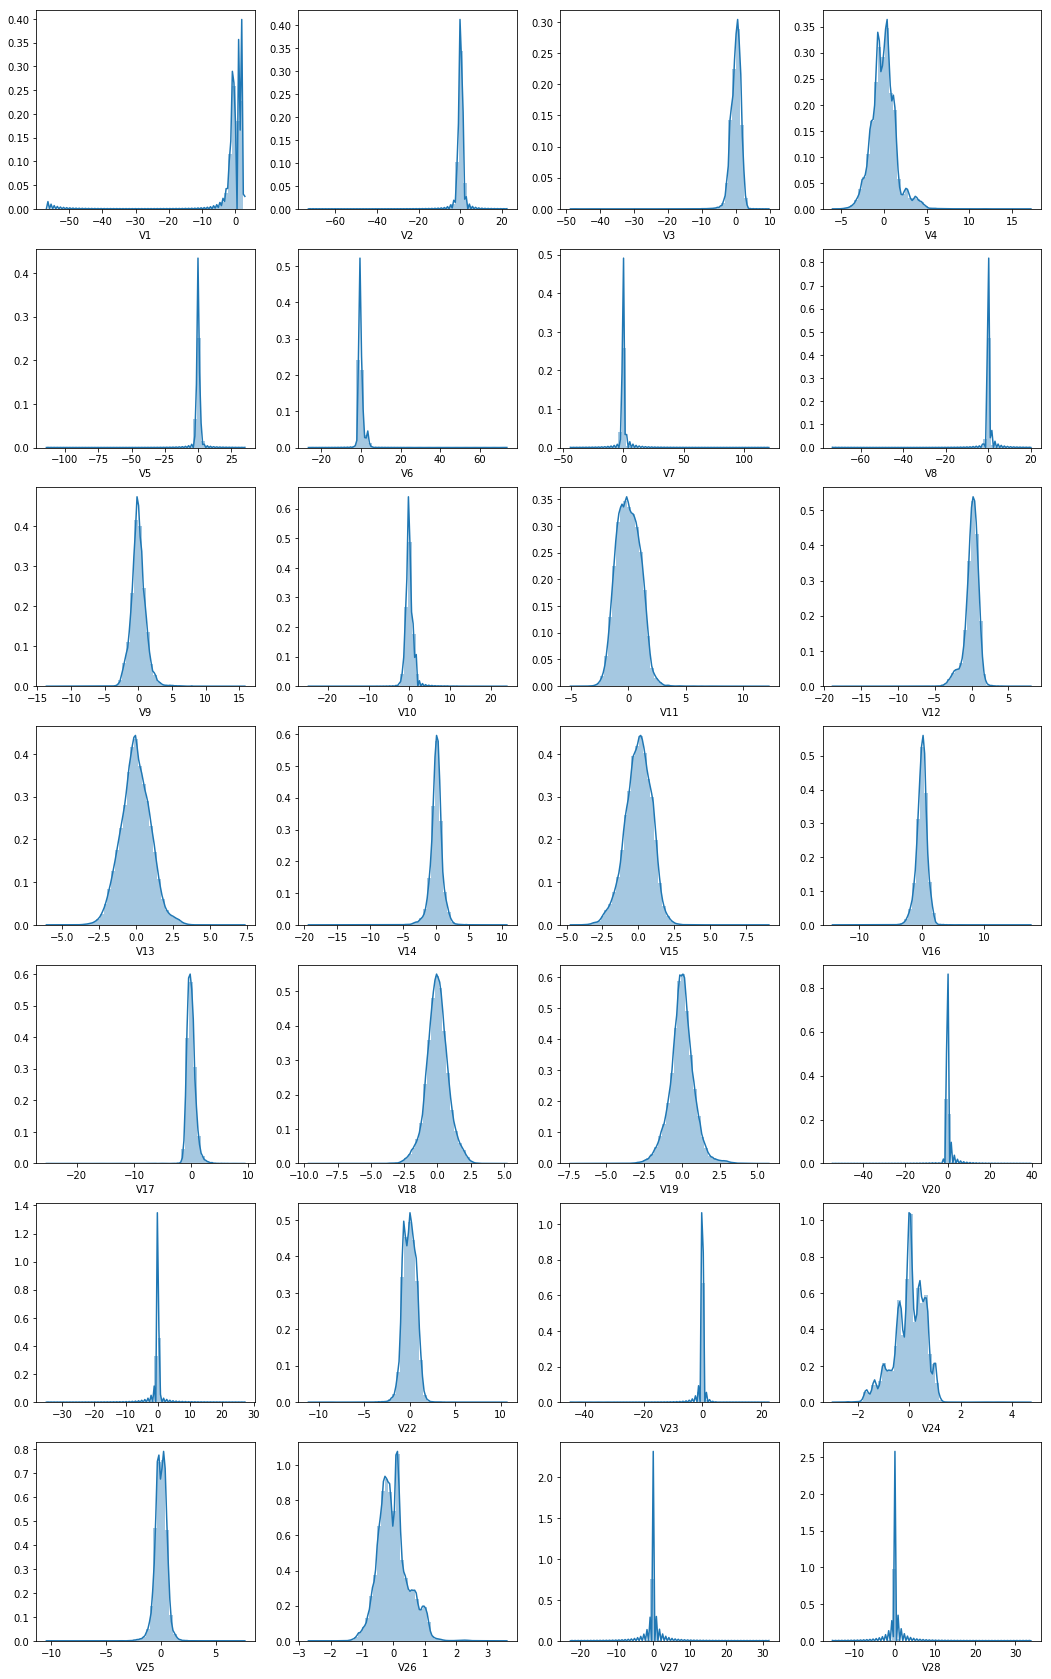

In [12]:
plt.figure(figsize=(18, 30))
plt.subplot(7,4,1)
sns.distplot(main_df['V1'])
plt.subplot(7,4,2)
sns.distplot(main_df['V2'])
plt.subplot(7,4,3)
sns.distplot(main_df['V3'])
plt.subplot(7,4,4)
sns.distplot(main_df['V4'])
plt.subplot(7,4,5)
sns.distplot(main_df['V5'])
plt.subplot(7,4,6)
sns.distplot(main_df['V6'])
plt.subplot(7,4,7)
sns.distplot(main_df['V7'])
plt.subplot(7,4,8)
sns.distplot(main_df['V8'])
plt.subplot(7,4,9)
sns.distplot(main_df['V9'])
plt.subplot(7,4,10)
sns.distplot(main_df['V10'])
plt.subplot(7,4,11)
sns.distplot(main_df['V11'])
plt.subplot(7,4,12)
sns.distplot(main_df['V12'])
plt.subplot(7,4,13)
sns.distplot(main_df['V13'])
plt.subplot(7,4,14)
sns.distplot(main_df['V14'])
plt.subplot(7,4,15)
sns.distplot(main_df['V15'])
plt.subplot(7,4,16)
sns.distplot(main_df['V16'])
plt.subplot(7,4,17)
sns.distplot(main_df['V17'])
plt.subplot(7,4,18)
sns.distplot(main_df['V18'])
plt.subplot(7,4,19)
sns.distplot(main_df['V19'])
plt.subplot(7,4,20)
sns.distplot(main_df['V20'])
plt.subplot(7,4,21)
sns.distplot(main_df['V21'])
plt.subplot(7,4,22)
sns.distplot(main_df['V22'])
plt.subplot(7,4,23)
sns.distplot(main_df['V23'])
plt.subplot(7,4,24)
sns.distplot(main_df['V24'])
plt.subplot(7,4,25)
sns.distplot(main_df['V25'])
plt.subplot(7,4,26)
sns.distplot(main_df['V26'])
plt.subplot(7,4,27)
sns.distplot(main_df['V27'])
plt.subplot(7,4,28)
sns.distplot(main_df['V28'])

- From the distplots seen above we can see that most of the variables are skewed except for V9 and V10, which have to be mitigated as it might be a cause of problem during building the model. We hence apply <b>Power Transformer</b> package present in the preprocessing library provided by sklearn to make distribution more gaussian.

In [13]:
main_df2=main_df.copy()
main_df3=main_df.copy()
main_df4=main_df.copy()
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
colist=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10',
        'V11','V12','V13','V14','V15','V16','V17','V18','V19','V20',
        'V21','V22','V23','V24','V25','V26','V27','V28']
main_df[colist]=pt.fit_transform(main_df[colist])

- We shall now re-check for the histograms for all the variables to see if they are more gaussian like.

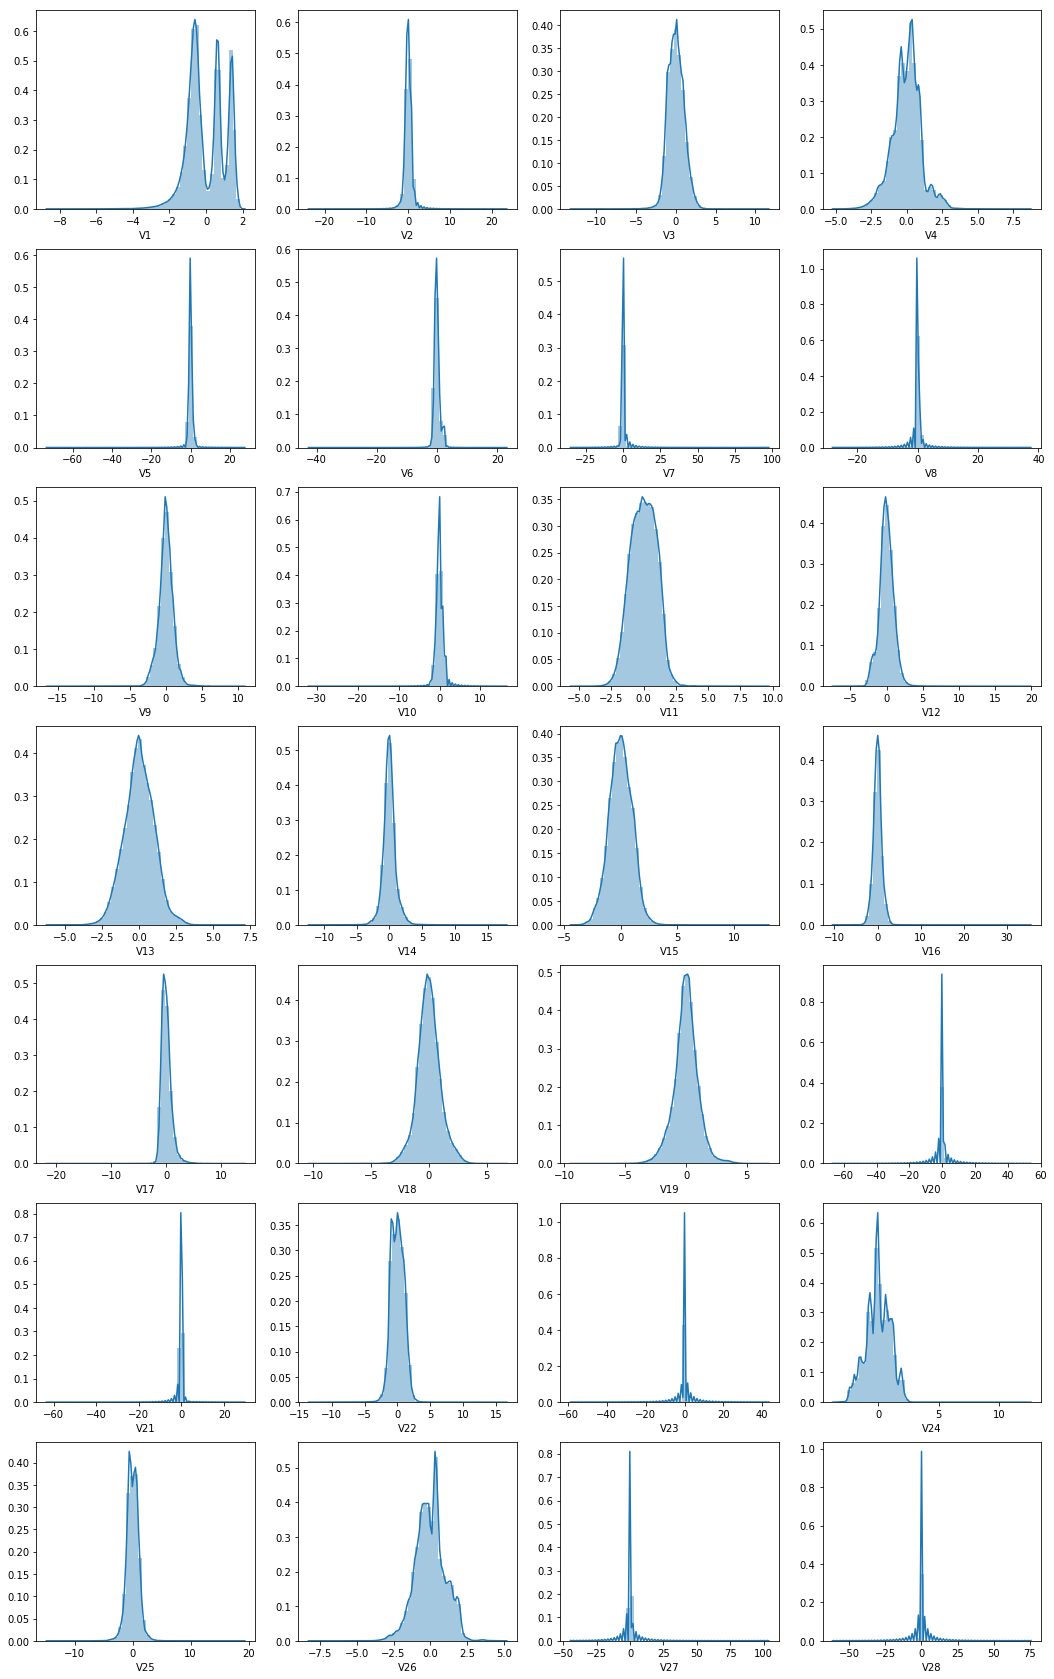

In [14]:
plt.figure(figsize=(18, 30))
plt.subplot(7,4,1)
sns.distplot(main_df['V1'])
plt.subplot(7,4,2)
sns.distplot(main_df['V2'])
plt.subplot(7,4,3)
sns.distplot(main_df['V3'])
plt.subplot(7,4,4)
sns.distplot(main_df['V4'])
plt.subplot(7,4,5)
sns.distplot(main_df['V5'])
plt.subplot(7,4,6)
sns.distplot(main_df['V6'])
plt.subplot(7,4,7)
sns.distplot(main_df['V7'])
plt.subplot(7,4,8)
sns.distplot(main_df['V8'])
plt.subplot(7,4,9)
sns.distplot(main_df['V9'])
plt.subplot(7,4,10)
sns.distplot(main_df['V10'])
plt.subplot(7,4,11)
sns.distplot(main_df['V11'])
plt.subplot(7,4,12)
sns.distplot(main_df['V12'])
plt.subplot(7,4,13)
sns.distplot(main_df['V13'])
plt.subplot(7,4,14)
sns.distplot(main_df['V14'])
plt.subplot(7,4,15)
sns.distplot(main_df['V15'])
plt.subplot(7,4,16)
sns.distplot(main_df['V16'])
plt.subplot(7,4,17)
sns.distplot(main_df['V17'])
plt.subplot(7,4,18)
sns.distplot(main_df['V18'])
plt.subplot(7,4,19)
sns.distplot(main_df['V19'])
plt.subplot(7,4,20)
sns.distplot(main_df['V20'])
plt.subplot(7,4,21)
sns.distplot(main_df['V21'])
plt.subplot(7,4,22)
sns.distplot(main_df['V22'])
plt.subplot(7,4,23)
sns.distplot(main_df['V23'])
plt.subplot(7,4,24)
sns.distplot(main_df['V24'])
plt.subplot(7,4,25)
sns.distplot(main_df['V25'])
plt.subplot(7,4,26)
sns.distplot(main_df['V26'])
plt.subplot(7,4,27)
sns.distplot(main_df['V27'])
plt.subplot(7,4,28)
sns.distplot(main_df['V28'])

- We can clearly see that though the variables are not perfectly in normal distribution, all of them are better placed aafter the yeo-johnson power transformation(since we have both positive and negetive values).

### Model-Building/Hyperparameter Tuning
- Note that here we would first perform Model Building and Hyperparameter Tuning on the imbalanced data and later again perform the same on balanced data.

- We shall use 4 Modelling/Classification Techniques : Logistic Regression, Decission Tree Classifier, Random Forest Classifier and XGBoost.

###### Also note that we shall be using n_jobs = -1 in our GridSearchCV only when the CV is ultra intensive so that the CPU doesnt get overloaded over repeated use.

##### Train/Test Split
- While dividing the test and train datasets, we will enabling the stratify parameter in the sklearn.model_selection.train_test_split so that we have equal ratio of representation of the classes in both the train and test splits. This will ensure that when we test the model on the test data it would give much better predictions of both the classes.

##### StratifiedKFold cross-validation
- Note that for all the modeling techniques that we would be using we will be using StratifiedKFold cross validation as our validation technique so that the minority class is correctly represented in the test folds. We shall select the number of folds or K-value as 10 or 5 based on the complexity of the algorithm.

In [15]:
X=main_df
y=X.pop('Class')

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.30)

- We also have to scale the amount variable in our data. The other variables aare assumed to be scalled before the PCA Transformation.

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
converts=['Amount']
X_train[converts] = scaler.fit_transform(X_train[converts])
X_train.head()
X_test[converts] = scaler.transform(X_test[converts])

#### Logistic Regression Model

In [18]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

- Performing Logistic Regression with StratifiedKFold Cross Validation using roc_auc as a scoring metric for 10 folds. Also note that roc_auc considers all the optimal cut off points for logistic regression.Note that we would first be using the default parameters and then be proceeding with the hyperparameter tuning.

In [19]:
logm = LogisticRegression()
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(logm, X_train, y_train, scoring='roc_auc', cv=folds)
scores

array([0.96995133, 0.97784142, 0.9751755 , 0.98486728, 0.97908871,
       0.99234632, 0.98036408, 0.9910414 , 0.96950055, 0.99111972])

In [20]:
scores.mean()*100,scores.std()*100

(98.11296318346452, 0.8056266752990038)

- We can see that we have a satisfactory roc_auc score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

##### Hyperparameter Tuning
- In logistic regression, we know that the hyperparameter that we can tune is the number of variables is the number of columns or features. We shall hence proceed to tune the hyperparameters using grid search CV.

In [22]:
# number of features in X_train
len(X_train.columns)

29

In [40]:
# create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 30, 5))}]


# perform grid search
logm = LogisticRegression()
logm.fit(X_train, y_train)
rfe = RFE(logm)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  7.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_features_to_select': [1, 6, 11, 16, 21, 26]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [41]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,22.044473,0.570611,0.015745,0.006165,1,{'n_features_to_select': 1},0.927924,0.934468,0.945501,0.924987,0.954488,0.937474,0.011046,6,0.941161,0.939596,0.936708,0.941408,0.933800,0.938534,0.002899
1,19.960222,0.336483,0.011375,0.000822,6,{'n_features_to_select': 6},0.944805,0.977491,0.988509,0.974657,0.972374,0.971567,0.014481,5,0.980346,0.970862,0.966617,0.972637,0.970882,0.972269,0.004499
2,18.390557,0.703292,0.012540,0.000768,11,{'n_features_to_select': 11},0.949154,0.986871,0.984347,0.975332,0.973527,0.973846,0.013356,2,0.982360,0.973297,0.974581,0.975880,0.975836,0.976391,0.003132
3,14.649761,0.158820,0.013150,0.001472,16,{'n_features_to_select': 16},0.947385,0.986300,0.981300,0.973185,0.974890,0.972612,0.013452,4,0.982005,0.975952,0.978707,0.978396,0.977761,0.978564,0.001968
4,10.618381,0.155526,0.014361,0.001966,21,{'n_features_to_select': 21},0.952669,0.984101,0.977808,0.973032,0.975576,0.972637,0.010637,3,0.983077,0.976136,0.977857,0.977483,0.976499,0.978210,0.002513
5,5.448900,0.030697,0.015971,0.001768,26,{'n_features_to_select': 26},0.960832,0.984634,0.976692,0.974676,0.975072,0.974381,0.007676,1,0.982139,0.976451,0.977819,0.977583,0.977580,0.978314,0.001971


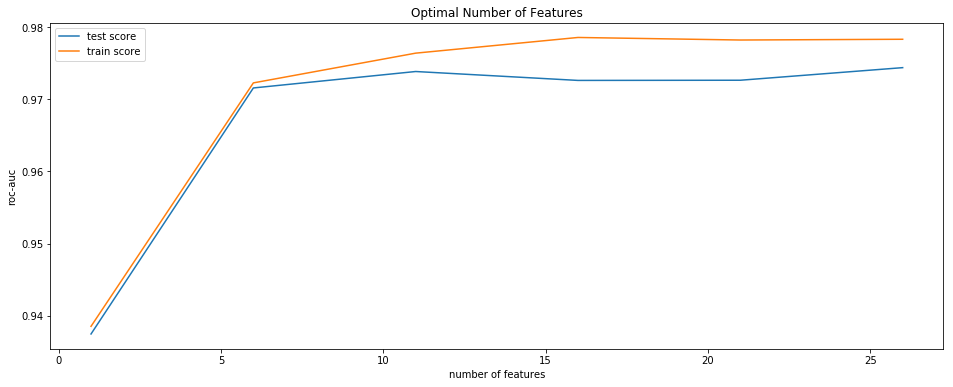

In [42]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('roc-auc')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

- We can see that we have a good test and train auc score at number of features=11 after which, though we see an increase in the train score there is a drop in the test score.
- Now we can proceed with the optimal value of number of features and build a final model.

In [22]:
n_features_optimal = 10

logm = LogisticRegression()
logm.fit(X_train, y_train)

rfe = RFE(logm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predictions on X_test
from sklearn.metrics import roc_auc_score
y_pred = rfe.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.8512751452431386


In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9993328885923949


- We can see that we have a decent roc_auc score of 0.85  which is our main metric, from the logistic regression and also a decent accuracy score.

#### Decision Tree
- Performing Decision Tree with StratifiedKFold Cross Validation using roc_auc as a scoring metric for 10 folds.Note that we would first be using the default parameters and then be proceeding with the hyperparameter tuning.

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(dtc, X_train, y_train, scoring='roc_auc', cv=folds)
scores

array([0.77117734, 0.91400936, 0.77130296, 0.87120246, 0.8381348 ,
       0.85268995, 0.88217708, 0.83795894, 0.94082475, 0.92624448])

In [20]:
scores.mean()*100,scores.std()*100

(86.05722113988797, 5.588021859138548)

- We can see that we have a satisfactory roc_auc score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

##### Hyperparameter Tuning
- In decision tree classifier, we know that there are multiple hyperparameters that we can tune. In this model we shall tune for:<br>max_depth(The maximum depth of the tree),<br>min_samples_leaf(The minimum number of samples required to be at a leaf node),<br> and min_samples_split(The minimum number of samples required to split an internal node).

##### Tuning max_depth

In [19]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 2)}

# instantiate the model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)


# fit tree on training data
dt = GridSearchCV(dtree, parameters, 
                    cv=n_folds,
                  n_jobs=-1,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
dt.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   54.1s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 2)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [20]:
# scores of GridSearch CV
cv_results = pd.DataFrame(dt.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.947781,0.057563,0.027528,0.003432,2,{'max_depth': 2},0.854899,0.825871,0.825935,0.869439,0.867490,0.848727,0.019292,7,0.872599,0.883497,0.865317,0.872565,0.865795,0.871955,0.006573
1,3.716219,0.045115,0.022740,0.001934,4,{'max_depth': 4},0.891078,0.869339,0.862186,0.869441,0.933636,0.885136,0.026116,1,0.919877,0.923544,0.916202,0.921695,0.909298,0.918123,0.005036
2,5.451233,0.023365,0.020944,0.000631,6,{'max_depth': 6},0.847818,0.820547,0.859442,0.879528,0.907533,0.862974,0.029332,4,0.927342,0.958467,0.954535,0.960214,0.955165,0.951145,0.012084
3,7.251613,0.003843,0.020345,0.000489,8,{'max_depth': 8},0.818711,0.832504,0.816494,0.864899,0.907242,0.847970,0.034310,8,0.936295,0.970634,0.960927,0.965875,0.960957,0.958937,0.011880
4,9.126816,0.090166,0.024535,0.003710,10,{'max_depth': 10},0.872250,0.830516,0.808190,0.836857,0.912576,0.852078,0.036578,6,0.972960,0.983261,0.971301,0.972376,0.982127,0.976405,0.005175
5,11.044527,0.102591,0.022540,0.000489,12,{'max_depth': 12},0.873847,0.751364,0.806542,0.862877,0.904504,0.839827,0.054416,9,0.984233,0.992887,0.983279,0.987950,0.992924,0.988255,0.004106
6,12.629365,0.367788,0.022540,0.001197,14,{'max_depth': 14},0.877521,0.811275,0.803441,0.836578,0.939440,0.853651,0.050075,5,0.990892,0.999463,0.993431,0.996478,0.998405,0.995734,0.003173
7,13.558811,1.038132,0.020546,0.004019,16,{'max_depth': 16},0.863148,0.833082,0.868955,0.865594,0.935227,0.873201,0.033567,2,0.999182,1.000000,0.999345,0.999840,0.999645,0.999602,0.000303
8,11.757093,1.320112,0.015156,0.003911,18,{'max_depth': 18},0.862072,0.833082,0.861093,0.854807,0.918175,0.865846,0.028180,3,0.999999,1.000000,0.999987,0.999996,0.999985,0.999993,0.000006


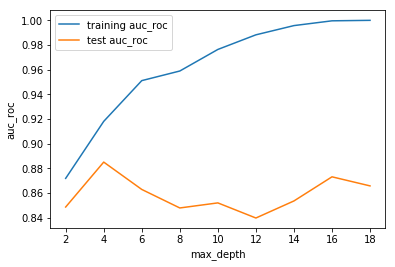

In [21]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("max_depth")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease due to overfitting. We can make note of the range and cummulatively tune all the hyperparameters at the end.

##### Tuning min_samples_leaf

In [22]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)


# fit tree on training data
dt = GridSearchCV(dtree, parameters, 
                    cv=n_folds,
                  n_jobs=-1,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
dt.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [23]:
# scores of GridSearch CV
cv_results = pd.DataFrame(dt.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.600031,1.061990,0.022340,0.000488,5,{'min_samples_leaf': 5},0.891061,0.854783,0.912803,0.898384,0.926216,0.896650,0.024175,10,0.999922,0.999927,0.999905,0.999920,0.999892,0.999913,0.000013
1,12.450802,1.288580,0.028923,0.009587,25,{'min_samples_leaf': 25},0.919661,0.905054,0.948895,0.905263,0.955462,0.926867,0.021435,9,0.999575,0.999645,0.999500,0.999608,0.999496,0.999565,0.000059
2,12.099517,1.442598,0.021941,0.001261,45,{'min_samples_leaf': 45},0.912078,0.911867,0.948507,0.912142,0.962662,0.929451,0.021803,7,0.999322,0.999328,0.999147,0.999332,0.999162,0.999258,0.000085
3,12.121184,1.341474,0.022142,0.000746,65,{'min_samples_leaf': 65},0.926162,0.911676,0.948362,0.911873,0.940298,0.927674,0.014800,8,0.999082,0.999191,0.998946,0.999191,0.999006,0.999083,0.000098
4,11.819205,1.195724,0.022341,0.000488,85,{'min_samples_leaf': 85},0.918662,0.911421,0.948102,0.911427,0.962460,0.930415,0.020972,6,0.998809,0.999035,0.998727,0.999037,0.998844,0.998890,0.000125
5,11.360879,1.317101,0.023139,0.001934,105,{'min_samples_leaf': 105},0.925761,0.925760,0.947916,0.911199,0.962210,0.934569,0.018130,5,0.998721,0.998801,0.998538,0.998881,0.998574,0.998703,0.000131
6,11.873074,1.945982,0.021742,0.000746,125,{'min_samples_leaf': 125},0.925612,0.939929,0.947797,0.918257,0.969448,0.940208,0.017931,4,0.998666,0.998763,0.998464,0.998730,0.998279,0.998581,0.000183
7,11.466779,1.686932,0.023154,0.001705,145,{'min_samples_leaf': 145},0.932782,0.924949,0.955044,0.925439,0.969390,0.941521,0.017716,2,0.998549,0.998666,0.998352,0.998620,0.998241,0.998486,0.000163
8,11.004877,1.673610,0.021742,0.001466,165,{'min_samples_leaf': 165},0.940112,0.924929,0.954829,0.925333,0.961774,0.941395,0.015010,3,0.998446,0.998486,0.998112,0.998525,0.998008,0.998315,0.000213
9,9.656670,1.337685,0.015760,0.003051,185,{'min_samples_leaf': 185},0.939850,0.931694,0.954685,0.924908,0.961879,0.942603,0.013836,1,0.998167,0.998227,0.997846,0.998196,0.997983,0.998084,0.000146


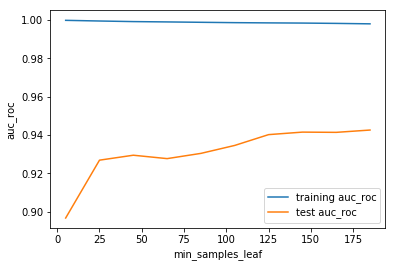

In [24]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_min_samples_leaf"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_min_samples_leaf"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("min_samples_leaf")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that at min_samples_leaf=185 the test auc scores have peaked. The training auc is however falling down.

##### Tuning min_samples_split

In [25]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)


# fit tree on training data
dt = GridSearchCV(dtree, parameters, 
                    cv=n_folds,
                  n_jobs=-1,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
dt.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [26]:
# scores of GridSearch CV
cv_results = pd.DataFrame(dt.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,13.102034,0.966943,0.022939,0.000631,5,{'min_samples_split': 5},0.862086,0.847564,0.883808,0.869343,0.911488,0.874858,0.021727,10,0.999999,0.999999,1.000000,0.999998,0.999998,0.999999,6.102068e-07
1,13.338134,0.896407,0.023936,0.002601,25,{'min_samples_split': 25},0.890937,0.876437,0.898237,0.891053,0.940838,0.899500,0.021850,8,0.999968,0.999974,0.999962,0.999961,0.999964,0.999966,4.818511e-06
2,13.420154,0.986627,0.023312,0.000460,45,{'min_samples_split': 45},0.890820,0.869150,0.898251,0.898243,0.940770,0.899447,0.023250,9,0.999908,0.999954,0.999942,0.999924,0.999906,0.999927,1.861439e-05
3,13.579269,0.994647,0.022740,0.000747,65,{'min_samples_split': 65},0.890773,0.905262,0.898184,0.898136,0.940756,0.906622,0.017671,7,0.999901,0.999930,0.999911,0.999900,0.999870,0.999902,1.944374e-05
4,13.557263,1.009021,0.022540,0.000798,85,{'min_samples_split': 85},0.890665,0.898003,0.898053,0.898049,0.955344,0.908023,0.023832,6,0.999860,0.999878,0.999871,0.999841,0.999825,0.999855,1.954598e-05
5,13.584483,0.951721,0.022939,0.001092,105,{'min_samples_split': 105},0.890665,0.898003,0.905091,0.897958,0.955309,0.909405,0.023401,5,0.999860,0.999878,0.999807,0.999814,0.999744,0.999821,4.687562e-05
6,13.631706,1.075547,0.023138,0.001162,125,{'min_samples_split': 125},0.890445,0.912319,0.905040,0.905102,0.962588,0.915099,0.024787,4,0.999795,0.999855,0.999789,0.999775,0.999654,0.999774,6.575977e-05
7,13.564655,0.974479,0.022939,0.000631,145,{'min_samples_split': 145},0.897646,0.912171,0.912123,0.912291,0.962542,0.919355,0.022317,3,0.999695,0.999765,0.999675,0.999670,0.999571,0.999675,6.212109e-05
8,13.551310,0.937510,0.022739,0.001163,165,{'min_samples_split': 165},0.897526,0.919260,0.911932,0.912201,0.962512,0.920686,0.022075,1,0.999652,0.999707,0.999575,0.999628,0.999541,0.999621,5.807887e-05
9,11.853071,2.024099,0.014926,0.001609,185,{'min_samples_split': 185},0.897526,0.919281,0.911860,0.912112,0.962512,0.920658,0.022087,2,0.999652,0.999682,0.999543,0.999601,0.999541,0.999604,5.690196e-05


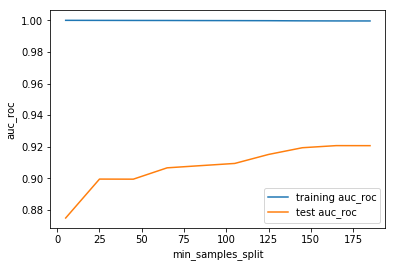

In [27]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_min_samples_split"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_min_samples_split"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("min_samples_split")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that the test auc peaks at min_samples_split=165, while the train auc score remains constant.

####  Grid Search to Find Optimal Hyperparameters
- We can now find the optimal parameters except for the peaked ones for all the hyperparameters using one final grid searchcv.

In [28]:
from sklearn.tree import DecisionTreeClassifier
# Create the parameter grid based on the results of previos search 
param_grid = {
    'max_depth': [4],
    'min_samples_leaf': [165,185],
    'min_samples_split': [165,185],
    'criterion': ["entropy", "gini"]
}
# Create a based model
dtree = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, scoring="roc_auc", 
                          cv = 3, n_jobs = -1,verbose = 1)

In [29]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   12.4s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [4],
                         'min_samples_leaf': [165, 185],
                         'min_samples_split': [165, 185]},
             scoring='roc_auc', verbose=1)

In [30]:
# printing the optimal auc score and hyperparameters
print('We can get auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get auc of 0.9553677941823402 using {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 165, 'min_samples_split': 165}


- Fitting the final model with the best parameters obtained from grid search.

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=4, 
                                  min_samples_leaf=165,
                                  min_samples_split=165)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=165,
                       min_samples_split=165, random_state=100)

In [32]:
# predictions on X_test
from sklearn.metrics import roc_auc_score
y_pred = dtree.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.8816453785985998


In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9993679997191109


- We can see that our main accuracy metric i.e. roc_auc score is 0.88 with a satisfactory accuracy score.

#### Random Forest Model
- Performing Random Forest with StratifiedKFold Cross Validation using roc_auc as a scoring metric for 10 folds.Note that we would first be using the default parameters and then be proceeding with the hyperparameter tuning.

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(rfc, X_train, y_train, scoring='roc_auc', cv=folds)
scores

array([0.95559312, 0.94136483, 0.94160171, 0.95606328, 0.92459744,
       0.96968602, 0.90872924, 0.96959513, 0.95471487, 0.96946878])

In [22]:
scores.mean()*100,scores.std()*100

(94.91414422265741, 1.9305724757890628)

- We can see that we have a satisfactory roc_auc score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

##### Hyperparameter Tuning
- In random forest, we know that there are multiple hyperparameters that we can tune. In this model we shall tune for:<br>n_estimators(The number of trees in the forest),<br>max_depth(The maximum depth of the tree),<br>min_samples_leaf(The minimum number of samples required to be at a leaf node),<br>min_samples_split(The minimum number of samples required to split an internal node)<br> and max_features(The number of features to consider when looking for the best split).

##### Tuning max_depth

In [66]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  return_train_score=True,
                   scoring="roc_auc")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [67]:
# cv results
cv_results = pd.DataFrame(rf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.397003,0.022749,0.022860,0.001100,2,{'max_depth': 2},0.907385,0.910192,0.948986,0.919771,0.904996,0.918266,0.016160,4,0.922175,0.914180,0.901467,0.906800,0.923067,0.913538,0.008449
1,4.497416,0.087680,0.030617,0.006182,7,{'max_depth': 7},0.945868,0.975321,0.974026,0.964570,0.927549,0.957467,0.018292,2,0.967428,0.987645,0.967226,0.974395,0.953895,0.970118,0.010994
2,7.575917,0.094939,0.035784,0.002381,12,{'max_depth': 12},0.964254,0.949716,0.956116,0.975020,0.952599,0.959541,0.009146,1,0.999215,0.997766,0.997796,0.998932,0.992476,0.997237,0.002451
3,10.508617,0.557735,0.042749,0.003720,17,{'max_depth': 17},0.974240,0.965108,0.938073,0.961272,0.935498,0.954838,0.015352,3,0.999986,0.999996,0.999998,0.999955,0.999998,0.999986,0.000016


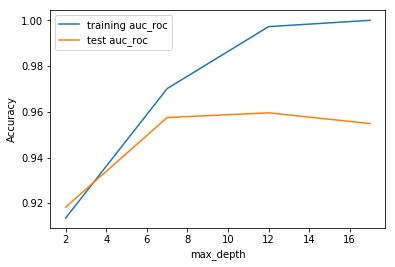

In [69]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("max_depth")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease due to overfitting. We can make note of the range and cummulatively tune all the hyperparameters at the end.

##### Tuning n_estimators
- Note that we would specify an appropriately low value of max_depth, so that the trees do not overfit.

In [72]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 700, 200)}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                    verbose = 1,
                  return_train_score=True,
                   scoring="roc_auc")
rf.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 20.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 700, 200)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [73]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,27.560239,0.420691,0.166917,0.001666,100,{'n_estimators': 100},0.999348,0.999072,0.999523,0.999298,0.999423,0.999333,0.000151,3,0.999455,0.999455,0.999398,0.999498,0.999498,0.999461,0.000037
1,82.031591,0.928749,0.474255,0.012963,300,{'n_estimators': 300},0.999373,0.999122,0.999599,0.999298,0.999423,0.999363,0.000156,2,0.999480,0.999473,0.999442,0.999511,0.999461,0.999473,0.000023
2,123.654395,0.270492,0.798480,0.028342,500,{'n_estimators': 500},0.999373,0.999147,0.999599,0.999298,0.999448,0.999373,0.000150,1,0.999467,0.999473,0.999442,0.999486,0.999492,0.999472,0.000017


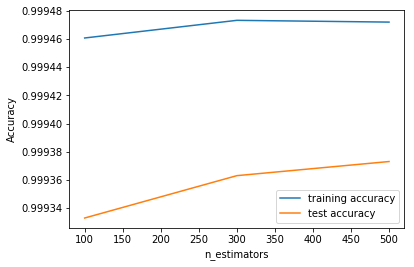

In [75]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_n_estimators"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_n_estimators"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("n_estimators")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of n_estimators, both train and test scores increase. But after a while the train score remains constant as the test score increases.

##### Tuning max_features
- Note that we would specify an appropriately low value of max_depth, so that the trees do not overfit.

In [89]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [5, 10, 15, 20, 25]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  verbose = 1,
                  return_train_score=True,
                   scoring="roc_auc")
rf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  3.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [5, 10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [90]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.525035,0.051673,0.023534,0.000488,5,{'max_features': 5},0.918119,0.924435,0.947917,0.943860,0.938337,0.934534,0.011419,1,0.932663,0.945804,0.928958,0.947115,0.960833,0.943075,0.011374
1,5.160981,0.125031,0.027927,0.005163,10,{'max_features': 10},0.912641,0.918321,0.949098,0.933947,0.949252,0.932652,0.015189,2,0.926947,0.935222,0.916131,0.926422,0.956334,0.932211,0.013496
2,7.499343,0.119122,0.023535,0.000801,15,{'max_features': 15},0.938858,0.905635,0.947702,0.927474,0.924256,0.928785,0.014265,3,0.949811,0.934506,0.933919,0.921752,0.940197,0.936037,0.009143
3,9.934617,0.204934,0.023336,0.001356,20,{'max_features': 20},0.919816,0.898312,0.948963,0.927182,0.911460,0.921147,0.016895,5,0.934100,0.932599,0.924971,0.926941,0.930906,0.929904,0.003435
4,12.361246,0.279369,0.023527,0.000796,25,{'max_features': 25},0.920134,0.898227,0.962671,0.927318,0.911623,0.923995,0.021628,4,0.925307,0.930707,0.934694,0.927072,0.925602,0.928676,0.003570


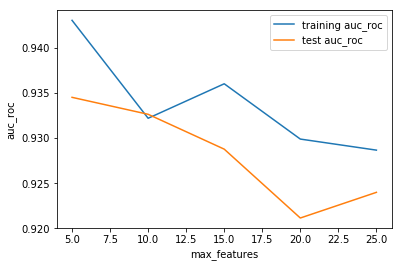

In [91]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_max_features"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_max_features"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("max_features")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that there is no clear trend in this, however ther is a constant test scores decrease, but after 20 features the  scores behave abnormally.

##### Tuning min_samples_leaf

In [83]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1000, 4000, 500)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
rf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(1000, 4000, 500)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [84]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.581071,0.269019,0.035496,0.003257,1000,{'min_samples_leaf': 1000},0.972430,0.964033,0.978321,0.968168,0.962486,0.969087,0.005769,4,0.986549,0.988096,0.985905,0.985740,0.985721,0.986402,0.000899
1,5.211191,0.412149,0.033518,0.002051,1500,{'min_samples_leaf': 1500},0.969707,0.966170,0.975681,0.969320,0.970741,0.970324,0.003083,2,0.983033,0.986608,0.984239,0.983860,0.984438,0.984435,0.001188
2,4.796163,0.196308,0.033300,0.001350,2000,{'min_samples_leaf': 2000},0.963719,0.961650,0.976151,0.974874,0.973808,0.970041,0.006087,3,0.978658,0.982096,0.983784,0.980830,0.980871,0.981248,0.001684
3,4.306524,0.298394,0.032108,0.000981,2500,{'min_samples_leaf': 2500},0.976206,0.960460,0.982098,0.973134,0.966412,0.971662,0.007547,1,0.983118,0.982478,0.975854,0.976847,0.977340,0.979128,0.003042
4,3.919706,0.147239,0.031711,0.002633,3000,{'min_samples_leaf': 3000},0.967376,0.953742,0.977267,0.963697,0.963616,0.965140,0.007568,6,0.979221,0.976436,0.975490,0.977697,0.976411,0.977051,0.001292
5,3.683532,0.127148,0.031111,0.001468,3500,{'min_samples_leaf': 3500},0.971940,0.951123,0.980420,0.971230,0.967268,0.968396,0.009641,5,0.974946,0.972935,0.973805,0.978222,0.973868,0.974755,0.001847


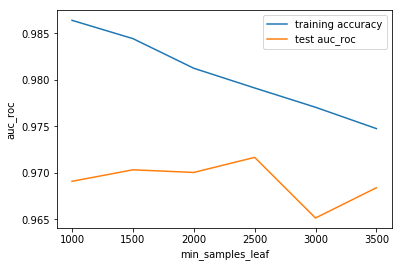

In [85]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_min_samples_leaf"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_min_samples_leaf"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("min_samples_leaf")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that at min_samples_leaf=2500 the test auc scores have peaked. The training auc is however falling down.

##### Tuning min_samples_split

In [86]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(2000, 5000, 500)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
rf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(2000, 5000, 500)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [87]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.256811,0.542209,0.040318,0.001353,2000,{'min_samples_split': 2000},0.967234,0.975915,0.972751,0.966605,0.977487,0.971998,0.004423,3,0.996310,0.997960,0.997626,0.998254,0.998318,0.997694,0.000734
1,8.760684,0.515375,0.039116,0.002633,2500,{'min_samples_split': 2500},0.971433,0.969610,0.967911,0.967378,0.970829,0.969432,0.001582,5,0.996572,0.996728,0.996740,0.996648,0.997099,0.996757,0.000181
2,9.011510,0.424795,0.039323,0.000489,3000,{'min_samples_split': 3000},0.973581,0.971855,0.965599,0.967139,0.967481,0.969131,0.003046,6,0.996267,0.995408,0.996140,0.997706,0.997794,0.996663,0.000935
3,9.120248,0.783048,0.043504,0.007381,3500,{'min_samples_split': 3500},0.974020,0.977505,0.980263,0.965240,0.965593,0.972524,0.006133,2,0.995560,0.995919,0.997154,0.996624,0.996820,0.996415,0.000588
4,9.487392,0.648335,0.041086,0.001467,4000,{'min_samples_split': 4000},0.978291,0.976534,0.970178,0.963526,0.965573,0.970820,0.005824,4,0.993198,0.994981,0.995149,0.995706,0.994855,0.994778,0.000842
5,9.066269,0.705242,0.041689,0.002311,4500,{'min_samples_split': 4500},0.976833,0.970701,0.975470,0.966069,0.973756,0.972566,0.003840,1,0.997080,0.995655,0.994750,0.994082,0.996117,0.995537,0.001046


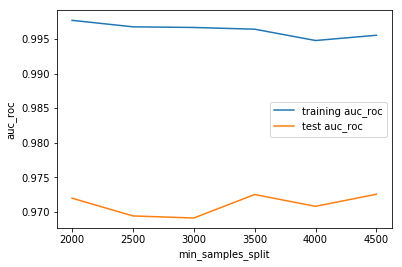

In [88]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_min_samples_split"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_min_samples_split"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("min_samples_split")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that the auc peaks at min_samples_split=3500

####  Grid Search to Find Optimal Hyperparameters
- We can now find the optimal parameters except for the peaked ones for all the hyperparameters using one final grid searchcv.

In [24]:
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of previos search 
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': [2500],
    'min_samples_split': [3500],
    'n_estimators': [500], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring="roc_auc", 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [99]:
# printing the optimal auc score and hyperparameters
print('We can get auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get auc of 0.9719122390434347 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 2500, 'min_samples_split': 3500, 'n_estimators': 500}


- Fitting the final model with the best parameters obtained from grid search.

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=2500, 
                             min_samples_split=3500 ,
                             max_features=10,
                             n_estimators=500)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2500, min_samples_split=3500,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
# predictions on X_test
from sklearn.metrics import roc_auc_score
y_pred = rfc.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.5


In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9982678510820079


- We can see that though the accuracy of the model is 99.8%, our main accuracy metric i.e. roc_auc that we would be considering is just 0.5.

#### XGBoost Model
- Performing XGBoost with StratifiedKFold Cross Validation using roc_auc as a scoring metric for 10 folds.Note that we would first be using the default parameters and then be proceeding with the hyperparameter tuning.

In [22]:
import xgboost as xgb
from xgboost import XGBClassifier
xg = XGBClassifier()
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(xg, X_train, y_train, scoring='roc_auc', cv=folds)
scores

array([0.98943241, 0.96867417, 0.9762034 , 0.95161326, 0.98302512,
       0.97591011, 0.97900746, 0.99756644, 0.9670213 , 0.97388225])

In [23]:
scores.mean()*100,scores.std()*100

(97.6233591143566, 1.198718001410992)

- We can see that we have a satisfactory roc_auc score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

##### Hyperparameter Tuning
- In XGBoost, we know that there are multiple hyperparameters that we can tune. In this model we shall tune for:<br>max_depth (Maximum depth of a tree),<br>subsample(Subsample ratio of the training instances.),<br>learning_rate(a weighting factor for the corrections by new trees when added to the model.)

##### Tuning max_depth

In [24]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 11, 2)}

# instantiate the model
xg = XGBClassifier()


# fit tree on training data
xg = GridSearchCV(xg, parameters, 
                    cv=n_folds,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
xg.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  5.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_w..._pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 11, 2)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=1)

In [25]:
# cv results
cv_results = pd.DataFrame(xg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.951698,0.116656,0.066147,0.006042,2,{'max_depth': 2},0.980416,0.985458,0.985898,0.977308,0.982458,0.982307,0.003207,1,0.999524,0.999456,0.999719,0.999727,0.999464,0.999578,0.000121
1,12.430484,0.245933,0.081434,0.011913,4,{'max_depth': 4},0.983972,0.978203,0.978673,0.966142,0.968975,0.975193,0.006616,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,14.630734,0.180056,0.090885,0.019428,6,{'max_depth': 6},0.974916,0.974838,0.983516,0.981354,0.978959,0.978717,0.003451,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,15.526909,0.316522,0.088686,0.014278,8,{'max_depth': 8},0.977934,0.976811,0.984230,0.977734,0.981510,0.979644,0.002797,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,15.994671,0.280855,0.091139,0.014900,10,{'max_depth': 10},0.977276,0.977795,0.981484,0.971660,0.979726,0.977588,0.003318,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


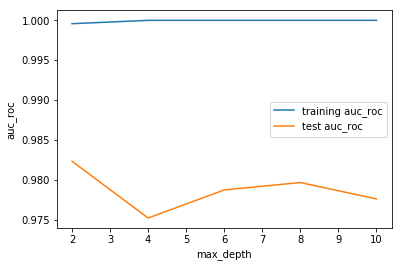

In [26]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("max_depth")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of max_depth, the train scores remains uniform throughout,the test score however is vobly and peaks at 8 and then starts to decrease due to overfitting. We can make note of the range and cummulatively tune all the hyperparameters at the end.

##### Tuning subsample
- Note that we would specify an appropriately low value of max_depth, so that the trees do not overfit.

In [31]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {"subsample": [0.3, 0.6, 0.9],
             'max_depth': [2]}

# instantiate the model
xg = XGBClassifier()


# fit tree on training data
xg = GridSearchCV(xg, parameters, 
                    cv=n_folds,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
xg.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_w..._pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'subsample': [0.3, 0.6, 0.9], 'max_depth': [2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [32]:
# cv results
cv_results = pd.DataFrame(xg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.539787,0.071238,0.068005,0.008354,2,0.3,"{'max_depth': 2, 'subsample': 0.3}",0.972570,0.970256,0.985198,0.970558,0.976155,0.974947,0.005540,3,0.998798,0.997935,0.998437,0.999254,0.998082,0.998501,0.000481
1,7.174644,0.037636,0.066676,0.006077,2,0.6,"{'max_depth': 2, 'subsample': 0.6}",0.974645,0.976556,0.982924,0.976887,0.986573,0.979517,0.004491,2,0.999458,0.998484,0.999681,0.999603,0.999730,0.999391,0.000463
2,8.081186,0.034429,0.067676,0.009133,2,0.9,"{'max_depth': 2, 'subsample': 0.9}",0.984478,0.981763,0.977786,0.976752,0.986635,0.981483,0.003785,1,0.999500,0.999518,0.999578,0.999629,0.999511,0.999547,0.000049


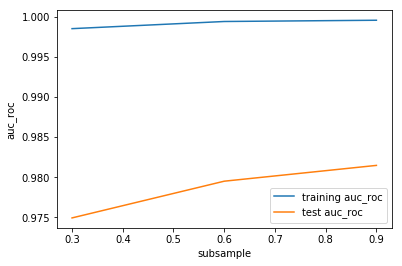

In [34]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_subsample"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_subsample"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("subsample")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of subsample, the train score increases, so does the test score before peaking at a subsample of 0.9.

##### Tuning learning_rate
- Note that we would specify an appropriately low value of max_depth, so that the trees do not overfit.

In [35]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {"learning_rate": [0.2, 0.6, 0.9],
             'max_depth': [2]}

# instantiate the model
xg = XGBClassifier()


# fit tree on training data
xg = GridSearchCV(xg, parameters, 
                    cv=n_folds,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
xg.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_w..._pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.2, 0.6, 0.9], 'max_depth': [2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [36]:
# cv results
cv_results = pd.DataFrame(xg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.924242,0.133612,0.067366,0.009442,0.2,2,"{'learning_rate': 0.2, 'max_depth': 2}",0.983841,0.984953,0.989169,0.981151,0.981191,0.984061,0.002954,1,0.998730,0.997710,0.998992,0.998669,0.998341,0.998488,0.000441
1,6.961373,0.028756,0.072980,0.006479,0.6,2,"{'learning_rate': 0.6, 'max_depth': 2}",0.988146,0.974573,0.983815,0.974432,0.981764,0.980546,0.005348,2,0.999997,0.999998,0.999994,0.999998,0.999997,0.999997,0.000001
2,6.884116,0.047476,0.064021,0.010181,0.9,2,"{'learning_rate': 0.9, 'max_depth': 2}",0.985592,0.959089,0.979955,0.975881,0.986153,0.977334,0.009877,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


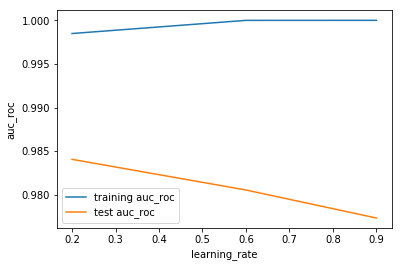

In [38]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_learning_rate"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_learning_rate"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("learning_rate")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of learning_rate, the train score increases, but the test score decreases after peaking at a learning_rate of 0.2.

####  Grid Search to Find Optimal Hyperparameters
- We can now find the optimal parameters except for the peaked ones for all the hyperparameters using one final grid searchcv.

In [39]:
# Create the parameter grid based on the results of previos search 
param_grid = {
    'max_depth': [8],
    "learning_rate": [0.2],
    "subsample": [0.6, 0.9]
    
}
# Create a based model
xg = XGBClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xg, param_grid = param_grid, scoring="roc_auc", 
                          cv = 3, n_jobs = -1,verbose = 1)

In [40]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_w..._pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [8], 'learning_rate': [0.2], 'subsample': [0.6, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [41]:
# printing the optimal auc score and hyperparameters
print('We can get auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get auc of 0.9754938989266447 using {'learning_rate': 0.2, 'max_depth': 8, 'subsample': 0.9}


- Fitting the final model with the best parameters obtained from grid search.

In [24]:
xg = XGBClassifier(learning_rate=0.2,
                    max_depth=8, 
                    subsample=0.9)
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.2, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=0.9,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
# predictions on X_test
from sklearn.metrics import roc_auc_score
y_pred = xg.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.905346785322165


In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9995552590615966


- We can see that we have an impressive AUC Score which is our main metric and also good accuracy.

#### The important features of the best model to understand the dataset (From the starter code given)
- The best model in our case is the XGBoost and hence we shall proceed with the same.
- Note that this will not give much explanation on the already transformed dataset, but it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


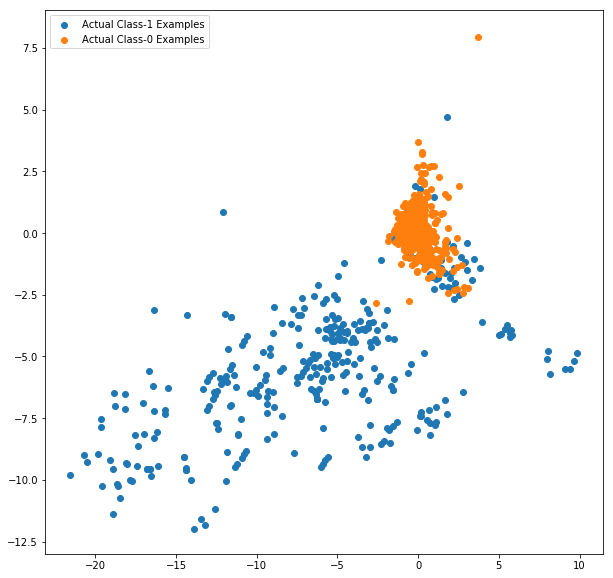

In [27]:
var_imp = []
for i in xg.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xg.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xg.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xg.feature_importances_)[-3])+1)

top_var_index = var_imp.index(np.sort(xg.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xg.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Model-Building/Hyperparameter Tuning on Balanced Data
- We shall now treat the data of imbalacement and check whether the above models perform better than on unbalanced data.
- We shall use three balancing techniques: 1) Random Oversampling  2)  ADASYN  3) SMOTE  
- Note that we shall be performing balancing only on Train Data which will then be divided into Train and Test using StratifiedKFold and KFold. This will ensure that the Main Test data of our is as close as the realtime data in which the number of fraudulent transactions is comparitively less than the regular transactions.

##### Note that the generic hyperparameters were choosen so that all of the models can handle them against the computational resources and also give a uniform result throughout. Once the balancing technique and the model is finalized we can further deep tune the models(i.e. input smaller hyperparameters) provided computational resources.

### Random Oversampling

In [19]:
main_df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- To handle the imbalance we first split into test and train sets before trying oversampling techniques. Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow our model to simply memorize specific data points and cause overfitting and poor generalization to the test data.

In [20]:
X=main_df2
y=X.pop('Class')

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.30)

In [22]:
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

- We rescale the data so that all the variables lie on a similar scale. Note that we fit the scale on the Train data and only transform it on the Test Data.

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
converts=['Amount']
X_train[converts] = scaler.fit_transform(X_train[converts])
X_train.head()
X_test[converts] = scaler.transform(X_test[converts])

In [24]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(random_state=0)
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [25]:
X_over=pd.DataFrame(X_over, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
X_over.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.266466,0.119198,0.063084,0.094105,-0.387478,-1.318295,0.313789,-0.297770,-0.007626,-0.131979,-0.223279,0.051053,-0.381407,0.509950,0.898774,0.140102,-0.180025,-0.954529,0.278964,-0.064368,-0.438326,-1.376137,0.197891,0.390202,0.080802,0.621842,-0.107067,0.005933,0.000971
1,-0.591399,-0.298550,-0.786280,-0.870372,0.807902,0.494936,1.465126,-0.150258,-0.166707,-0.465392,-0.285533,0.394701,0.108305,0.177191,-1.188016,0.457926,-1.047428,0.106298,0.699659,-0.187142,-0.235963,-0.583673,0.083525,-0.315355,-0.603937,0.244572,0.097506,-0.039498,0.010608
2,1.982835,0.185162,-1.344628,0.742356,-0.294456,-1.959474,0.243732,-0.396403,0.611802,-0.466213,0.397943,0.084128,-0.709493,-0.560657,0.940802,-0.087857,0.805469,0.189957,-0.834196,-0.273365,0.254179,0.882134,0.100720,0.792908,0.101228,-0.151443,-0.001896,-0.023625,0.000194
3,1.178061,0.414505,-0.407318,0.728503,0.086546,-0.763719,0.133366,0.027502,-0.243419,-0.435184,1.997045,0.085772,-1.465768,-0.524389,0.613161,0.362450,0.989578,0.274695,-0.460726,-0.186204,-0.060020,-0.181791,-0.021590,0.102429,0.398094,0.372600,-0.029381,0.022384,0.000030
4,-1.502940,1.524004,0.530509,0.795671,-0.418355,-0.223532,0.458368,0.165350,-0.137486,0.304786,-0.630563,-0.678801,-1.353946,0.707632,1.454961,-0.481625,0.277359,-0.182816,0.113313,-0.478363,0.281980,0.508382,0.033550,0.052330,-0.412103,-0.381767,-0.862571,0.124166,0.001993


In [26]:
y_over=pd.Series(y_over)

In [27]:
y_over.value_counts()

1    199020
0    199020
dtype: int64

In [28]:
X_over.shape

(398040, 29)

- We can now see that both the classes have equal representation in the train data set. We can hence proceed with our modeling techniques as before.

#### Logistic Regression Model

In [29]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

- Performing Logistic Regression with StratifiedKFold Cross Validation using roc_auc as a scoring metric for 10 folds. Also note that roc_auc considers all the optimal cut off points for logistic regression.Note that we would first be using the default parameters and then be proceeding with the hyperparameter tuning.

In [30]:
logm = LogisticRegression(max_iter=10000)
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(logm, X_over, y_over, scoring='roc_auc', cv=folds)
scores

array([0.98699248, 0.98664028, 0.98593142, 0.98625997, 0.98596674,
       0.98545967, 0.98595178, 0.98682241, 0.98652966, 0.98645716])

In [31]:
scores.mean()*100,scores.std()*100

(98.63011575557138, 0.04496200553040482)

- We can see that we have a satisfactory roc_auc score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

##### Hyperparameter Tuning
- In logistic regression, we know that the hyperparameter that we can tune is the number of variables is the number of columns or features. We shall hence proceed to tune the hyperparameters using grid search CV.

In [32]:
# number of features in X_train
len(X_over.columns)

29

In [33]:
# create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 30, 6))}]


# perform grid search
logm = LogisticRegression(max_iter=10000)
logm.fit(X_over, y_over)
rfe = RFE(logm)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_over, y_over)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  9.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LogisticRegression(max_iter=10000)),
             param_grid=[{'n_features_to_select': [1, 7, 13, 19, 25]}],
             return_train_score=True, scoring='roc_auc', verbose=1)

In [34]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,31.636924,3.266413,0.024994,0.007653,1,{'n_features_to_select': 1},0.957211,0.956103,0.449595,0.958947,0.447473,0.753866,0.249305,5,0.957510,0.957791,0.451134,0.957076,0.451663,0.755035,0.247918
1,28.371756,2.268085,0.031237,0.009880,7,{'n_features_to_select': 7},0.979805,0.979989,0.977072,0.978728,0.977738,0.978666,0.001136,4,0.979665,0.979607,0.978098,0.978501,0.977893,0.978753,0.000748
2,25.254682,1.523987,0.034422,0.011748,13,{'n_features_to_select': 13},0.985492,0.984932,0.984208,0.985191,0.985002,0.984965,0.000425,3,0.984935,0.985087,0.985113,0.984914,0.984915,0.984993,0.000088
3,21.241639,1.305578,0.040615,0.007654,19,{'n_features_to_select': 19},0.986228,0.985425,0.984982,0.985756,0.985816,0.985641,0.000417,2,0.985599,0.985722,0.985795,0.985566,0.985612,0.985659,0.000086
4,10.604125,0.134308,0.037491,0.007652,25,{'n_features_to_select': 25},0.986755,0.985982,0.985563,0.986243,0.986374,0.986183,0.000398,1,0.986143,0.986289,0.986344,0.986070,0.986154,0.986200,0.000101


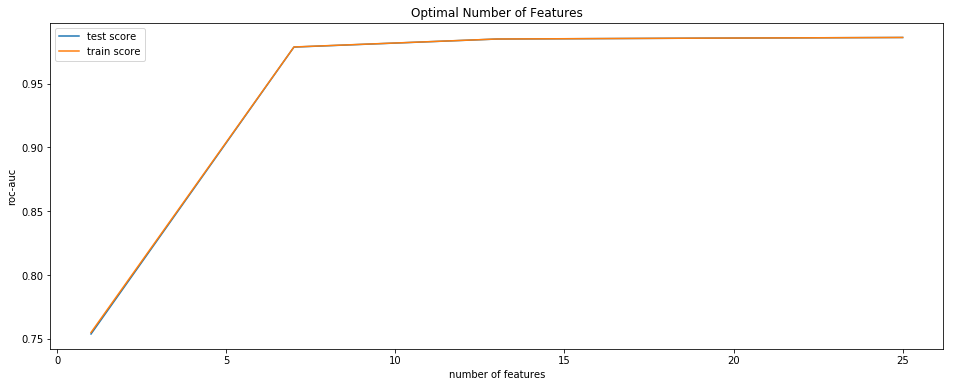

In [35]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('roc-auc')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

- We can see that we have a good test and train auc score post number of features=7 , there is a uniform increase in the test and train scores from the cv_results.To avoid over complexity we shall proceed with n_features_optimal = 10.
- Note that due to random oversampling there will be multiple copies of the already existing data points and hence the train and test in this case of cross validation will be very similar to each other.
- Now we can proceed with the optimal value of number of features and build a final model.

In [36]:
n_features_optimal = 10

logm = LogisticRegression(max_iter=10000)
logm.fit(X_over, y_over)

rfe = RFE(logm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_over, y_over)

# predictions on X_test
from sklearn.metrics import roc_auc_score
y_pred = rfe.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.9444567185744864


In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9766393970249172


- We can see that we have a good roc_auc score of 0.94  which is our main metric, from the logistic regression and also a decent accuracy score.

#### Decision Tree
- Performing Decision Tree with StratifiedKFold Cross Validation using roc_auc as a scoring metric for 10 folds.Note that we would first be using the default parameters and then be proceeding with the hyperparameter tuning.

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(dtc, X_over, y_over, scoring='roc_auc', cv=folds)
scores

array([0.99977389, 0.99989951, 0.99974877, 0.99974877, 0.99979902,
       0.99992463, 0.99977389, 0.99989951, 0.99962315, 0.99987438])

In [53]:
scores.mean()*100,scores.std()*100

(99.9806552105316, 0.008850324064822645)

- We can see that we have a satisfactory roc_auc score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

##### Hyperparameter Tuning
- In decision tree classifier, we know that there are multiple hyperparameters that we can tune. In this model we shall tune for:<br>max_depth(The maximum depth of the tree),<br>min_samples_leaf(The minimum number of samples required to be at a leaf node),<br> and min_samples_split(The minimum number of samples required to split an internal node).

##### Tuning max_depth

In [29]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 7)}

# instantiate the model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)


# fit tree on training data
dt = GridSearchCV(dtree, parameters, 
                    cv=n_folds,
                  n_jobs=-1,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
dt.fit(X_over, y_over)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   20.9s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 7)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [30]:
# scores of GridSearch CV
cv_results = pd.DataFrame(dt.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.254929,0.263279,0.050665,0.005964,2,{'max_depth': 2},0.969876,0.970479,0.970422,0.970380,0.970512,0.970334,0.000233,3,0.970451,0.970304,0.970318,0.970326,0.970296,0.970339,0.000057
1,10.376590,0.677755,0.044681,0.002475,9,{'max_depth': 9},0.999387,0.999387,0.999260,0.999419,0.999520,0.999395,0.000083,2,0.999495,0.999497,0.999547,0.999502,0.999489,0.999506,0.000021
2,9.633816,1.639736,0.031315,0.006867,16,{'max_depth': 16},0.999550,0.999671,0.999597,0.999767,0.999681,0.999653,0.000075,1,0.999826,0.999815,0.999833,0.999866,0.999814,0.999831,0.000019


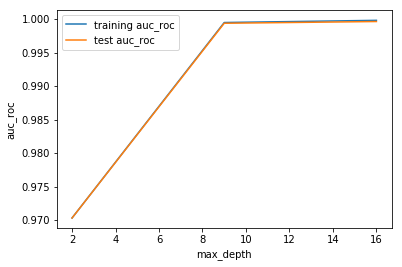

In [31]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("max_depth")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of max_depth, both train and test scores increase till max_depth=9 , but after that test score and the train scores remain uniform over the increse of max_depth. We shall hence consider max_depth as 9 to avoid increasing the complexity.
- Note that due to random oversampling there will be multiple copies of the already existing data points and hence the train and test in this case of cross validation will be very similar to each other.

##### Tuning min_samples_leaf

In [32]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1000, 4000, 500)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)


# fit tree on training data
dt = GridSearchCV(dtree, parameters, 
                    cv=n_folds,
                  n_jobs=-1,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
dt.fit(X_over, y_over)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   36.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'min_samples_leaf': range(1000, 4000, 500)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [33]:
# scores of GridSearch CV
cv_results = pd.DataFrame(dt.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.554817,0.918428,0.049666,0.006384,1000,{'min_samples_leaf': 1000},0.998431,0.998500,0.998503,0.998284,0.998433,0.998430,0.000080,1,0.998469,0.998609,0.998610,0.998484,0.998466,0.998528,0.000067
1,9.633962,0.848145,0.046476,0.007918,1500,{'min_samples_leaf': 1500},0.998019,0.997967,0.997996,0.997839,0.997989,0.997962,0.000064,2,0.997986,0.998033,0.998047,0.998036,0.997984,0.998017,0.000027
2,9.331612,0.342244,0.050066,0.013490,2000,{'min_samples_leaf': 2000},0.997290,0.997076,0.997232,0.997160,0.997188,0.997189,0.000072,3,0.997256,0.997172,0.997267,0.997269,0.997258,0.997244,0.000037
3,9.118213,0.491528,0.044680,0.002779,2500,{'min_samples_leaf': 2500},0.996238,0.996267,0.996638,0.996201,0.996625,0.996394,0.000195,4,0.996252,0.996445,0.996743,0.996284,0.996717,0.996488,0.000208
4,8.251777,0.847643,0.043086,0.002309,3000,{'min_samples_leaf': 3000},0.995846,0.995405,0.995885,0.995874,0.995785,0.995759,0.000181,5,0.995867,0.995515,0.995861,0.995867,0.995882,0.995798,0.000142
5,6.714179,0.423406,0.030125,0.002915,3500,{'min_samples_leaf': 3500},0.995025,0.994659,0.995103,0.995085,0.995089,0.994992,0.000169,6,0.995102,0.994726,0.995083,0.995087,0.995089,0.995018,0.000146


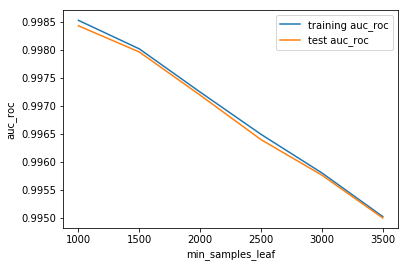

In [34]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_min_samples_leaf"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_min_samples_leaf"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("min_samples_leaf")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that at min_samples_leaf=1000 the test auc scores and the train auc scores have peaked. We can see a constant drop upon further increasing the min_samples_leaf.
- Note that due to random oversampling there will be multiple copies of the already existing data points and hence the train and test in this case of cross validation will be very similar to each other.

##### Tuning min_samples_split

In [35]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(2000, 5000, 700)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)


# fit tree on training data
dt = GridSearchCV(dtree, parameters, 
                    cv=n_folds,
                  n_jobs=-1,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
dt.fit(X_over, y_over)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   48.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'min_samples_split': range(2000, 5000, 700)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [36]:
# scores of GridSearch CV
cv_results = pd.DataFrame(dt.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,13.411578,0.364833,0.043484,0.003251,2000,{'min_samples_split': 2000},0.999643,0.999716,0.999613,0.999684,0.999771,0.999686,0.000055,1,0.999786,0.999804,0.999834,0.999795,0.999813,0.999806,0.000016
1,13.649592,0.550012,0.045430,0.004211,2700,{'min_samples_split': 2700},0.999167,0.999240,0.999148,0.999175,0.999257,0.999197,0.000043,2,0.999278,0.999329,0.999336,0.999278,0.999274,0.999299,0.000028
2,14.003672,0.575899,0.046372,0.002995,3400,{'min_samples_split': 3400},0.998752,0.998798,0.998764,0.998767,0.998843,0.998785,0.000033,3,0.998885,0.998887,0.998882,0.998872,0.998885,0.998882,0.000006
3,13.327523,0.207269,0.044282,0.001494,4100,{'min_samples_split': 4100},0.998400,0.998472,0.998447,0.998438,0.998546,0.998461,0.000049,4,0.998571,0.998566,0.998558,0.998552,0.998557,0.998561,0.000007
4,12.560846,2.457617,0.030910,0.005051,4800,{'min_samples_split': 4800},0.998005,0.998003,0.997949,0.998027,0.998026,0.998002,0.000028,5,0.998087,0.998097,0.998101,0.998088,0.998092,0.998093,0.000005


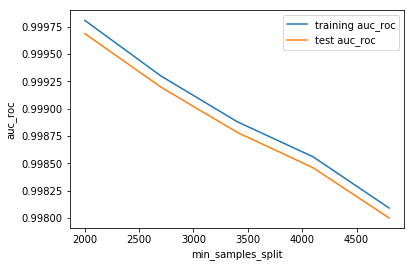

In [37]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_min_samples_split"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_min_samples_split"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("min_samples_split")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that the auc scores of both test and train are constant throughout.
- Note that due to random oversampling there will be multiple copies of the already existing data points and hence the train and test in this case of cross validation will be very similar to each other.

####  Grid Search to Find Optimal Hyperparameters
- We can now find the optimal parameters except for the peaked ones for all the hyperparameters using one final grid searchcv.

In [38]:
from sklearn.tree import DecisionTreeClassifier
# Create the parameter grid based on the results of previos search 
param_grid = {
    'max_depth': [9],
    'min_samples_leaf': [1000],
    'min_samples_split': [2000],
    'criterion': ["entropy", "gini"]
}
# Create a based model
dtree = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, scoring="roc_auc", 
                          cv = 3, n_jobs = -1,verbose = 1)

In [39]:
grid_search.fit(X_over, y_over)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    6.7s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [9],
                         'min_samples_leaf': [1000],
                         'min_samples_split': [2000]},
             scoring='roc_auc', verbose=1)

In [40]:
# printing the optimal auc score and hyperparameters
print('We can get auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get auc of 0.9983523332008483 using {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1000, 'min_samples_split': 2000}


- Fitting the final model with the best parameters obtained from grid search.

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=9,
                               min_samples_split=2000,
                                  min_samples_leaf=1000,
                        )
dtree.fit(X_over, y_over)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=1000,
                       min_samples_split=2000, random_state=100)

In [42]:
# predictions on X_test
from sklearn.metrics import roc_auc_score
y_pred = dtree.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.8895761213467409


In [43]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9748019147267769


- We can see that our main accuracy metric i.e. roc_auc score is 0.88 with a satisfactory accuracy score.

#### Random Forest Model
- Performing Random Forest with StratifiedKFold Cross Validation using roc_auc as a scoring metric for 5 folds.Note that we would first be using the default parameters and then be proceeding with the hyperparameter tuning.

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(rfc, X_over, y_over, scoring='roc_auc', cv=folds)
scores

array([0.99998745, 1.        , 1.        , 1.        , 1.        ])

In [39]:
scores.mean()*100,scores.std()*100

(99.99974907786114, 0.0005018442777160459)

- We can see that we have a satisfactory roc_auc score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

##### Hyperparameter Tuning
- In random forest, we know that there are multiple hyperparameters that we can tune. In this model we shall tune for:<br>max_depth(The maximum depth of the tree),<br>min_samples_leaf(The minimum number of samples required to be at a leaf node),<br>min_samples_split(The minimum number of samples required to split an internal node)<br> and max_features(The number of features to consider when looking for the best split).

##### Tuning max_depth

In [40]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 7)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
rf.fit(X_over, y_over)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 15.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 7)}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [41]:
# cv results
cv_results = pd.DataFrame(rf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,23.946288,0.335783,0.340554,0.006254,2,{'max_depth': 2},0.975735,0.977492,0.975383,0.975009,0.974443,0.975612,1.032741e-03,3,0.976425,0.977276,0.974682,0.975079,0.974572,0.975607,1.063871e-03
1,71.748343,0.739498,0.501203,0.002500,9,{'max_depth': 9},0.999909,0.999836,0.999906,0.999912,0.999926,0.999898,3.181238e-05,2,0.999944,0.999893,0.999931,0.999920,0.999942,0.999926,1.838722e-05
2,86.384776,0.866778,0.593808,0.009993,16,{'max_depth': 16},0.999999,1.000000,1.000000,1.000000,1.000000,1.000000,3.699199e-07,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.965068e-17


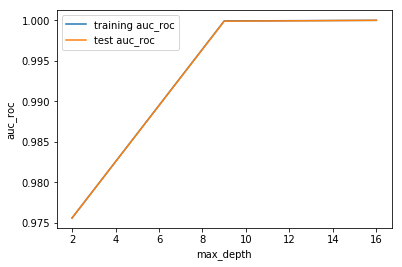

In [42]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("max_depth")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of max_depth, both train and test scores increase till max_depth=9 , but after that test score and the train scores remain uniform over the increse of max_depth. We shall hence consider max_depth as 9 to avoid increasing the complexity.
- Note that due to random oversampling there will be multiple copies of the already existing data points and hence the train and test in this case of cross validation will be very similar to each other.

##### Tuning max_features
- Note that we would not be tuning n_estimators due to computational limitations and be using the default n_estimators throughout.
- Note that we would specify an appropriately low value of max_depth, so that the trees do not overfit.

In [43]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [5, 10, 15, 20, 25]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  verbose = 1,
                  return_train_score=True,
                   scoring="roc_auc")
rf.fit(X_over, y_over)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 43.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_features': [5, 10, 15, 20, 25]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [44]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,40.379768,0.941503,0.389094,0.021240,5,{'max_features': 5},0.988983,0.990124,0.990100,0.990084,0.990455,0.989949,0.000502,4,0.989369,0.990226,0.989933,0.990071,0.990333,0.989987,0.000337
1,71.003934,0.515252,0.368807,0.007778,10,{'max_features': 10},0.989905,0.989432,0.990364,0.989778,0.990768,0.990049,0.000467,2,0.990226,0.989657,0.990180,0.989791,0.990745,0.990120,0.000382
2,102.597790,0.766988,0.390360,0.030721,15,{'max_features': 15},0.989951,0.989631,0.990573,0.989982,0.991033,0.990234,0.000502,1,0.990152,0.989898,0.990292,0.989972,0.990961,0.990255,0.000379
3,134.734842,2.073753,0.371931,0.006131,20,{'max_features': 20},0.989170,0.988855,0.990724,0.989979,0.989554,0.989657,0.000653,5,0.989484,0.989251,0.990536,0.989916,0.989410,0.989719,0.000464
4,163.869539,0.670040,0.375140,0.000198,25,{'max_features': 25},0.988897,0.990220,0.990779,0.989725,0.990415,0.990007,0.000651,3,0.989212,0.990457,0.990523,0.989592,0.990358,0.990028,0.000528


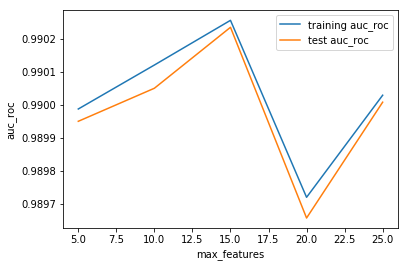

In [45]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_max_features"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_max_features"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("max_features")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that there is no clear trend in this, however the train and test scores peak at max_features=15.
- Note that due to random oversampling there will be multiple copies of the already existing data points and hence the train and test in this case of cross validation will be very similar to each other.

##### Tuning min_samples_leaf

In [31]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1000, 4000, 500)}

# instantiate the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
rf.fit(X_over, y_over)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 34.4min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(1000, 4000, 500)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [32]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,72.042806,0.428485,0.537590,0.007603,1000,{'min_samples_leaf': 1000},0.999541,0.999594,0.999579,0.999590,0.999566,0.999574,0.000019,1,0.999564,0.999603,0.999577,0.999579,0.999600,0.999585,0.000015
1,69.252166,0.801010,0.531192,0.017047,1500,{'min_samples_leaf': 1500},0.998808,0.998762,0.999080,0.998918,0.998977,0.998909,0.000115,2,0.998832,0.998847,0.999060,0.998850,0.999042,0.998926,0.000102
2,66.244575,0.727993,0.525032,0.027350,2000,{'min_samples_leaf': 2000},0.998101,0.997940,0.997898,0.997878,0.998044,0.997972,0.000086,3,0.998106,0.998062,0.997899,0.997802,0.998122,0.997998,0.000126
3,64.559426,0.749199,0.509534,0.007766,2500,{'min_samples_leaf': 2500},0.996949,0.996769,0.997089,0.997086,0.997133,0.997005,0.000133,4,0.996922,0.996922,0.997139,0.996974,0.997194,0.997030,0.000115
4,62.923829,0.234670,0.515646,0.024142,3000,{'min_samples_leaf': 3000},0.995978,0.995661,0.995796,0.996203,0.995963,0.995920,0.000183,5,0.995928,0.995878,0.995823,0.996091,0.996025,0.995949,0.000097
5,61.161647,0.880930,0.490582,0.007595,3500,{'min_samples_leaf': 3500},0.995070,0.994882,0.994938,0.995387,0.994689,0.994993,0.000232,6,0.995018,0.995066,0.995009,0.995239,0.994707,0.995008,0.000172


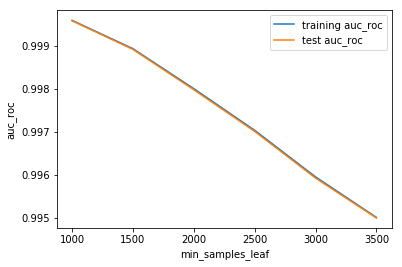

In [33]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_min_samples_leaf"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_min_samples_leaf"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("min_samples_leaf")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that at min_samples_leaf=1000 the test auc scores and the train auc scores have peaked. We can see a constant drop upon further increasing the min_samples_leaf.
- Note that due to random oversampling there will be multiple copies of the already existing data points and hence the train and test in this case of cross validation will be very similar to each other.

##### Tuning min_samples_split

In [35]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(2000, 5000, 700)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
rf.fit(X_over, y_over)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 40.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(2000, 5000, 700)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [36]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,94.981000,4.957325,0.665458,0.037656,2000,{'min_samples_split': 2000},0.999987,0.999990,0.999978,0.999985,0.999971,0.999982,0.000007,1,0.999996,0.999997,0.999996,0.999997,0.999997,0.999997,5.716553e-07
1,97.310256,2.178781,0.675411,0.012739,2700,{'min_samples_split': 2700},0.999974,0.999965,0.999962,0.999973,0.999949,0.999965,0.000009,2,0.999979,0.999977,0.999982,0.999982,0.999979,0.999980,1.815124e-06
2,94.103688,0.718202,0.661568,0.017938,3400,{'min_samples_split': 3400},0.999944,0.999943,0.999937,0.999941,0.999925,0.999938,0.000007,3,0.999955,0.999958,0.999958,0.999948,0.999960,0.999956,4.226611e-06
3,91.317654,1.115653,0.623081,0.012712,4100,{'min_samples_split': 4100},0.999838,0.999864,0.999846,0.999891,0.999807,0.999849,0.000028,4,0.999859,0.999879,0.999870,0.999894,0.999859,0.999872,1.328904e-05
4,85.183129,1.976928,0.597618,0.009890,4800,{'min_samples_split': 4800},0.999682,0.999622,0.999640,0.999768,0.999677,0.999678,0.000050,5,0.999701,0.999649,0.999668,0.999773,0.999736,0.999705,4.509026e-05


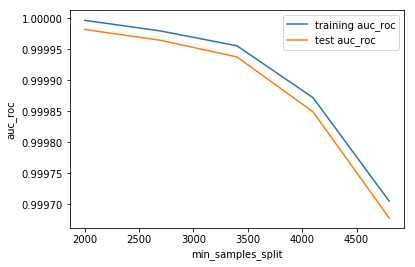

In [37]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_min_samples_split"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_min_samples_split"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("min_samples_split")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that the auc peaks at min_samples_split=2000 and then falls down as we increase the min_samples_split.
- Note that due to random oversampling there will be multiple copies of the already existing data points and hence the train and test in this case of cross validation will be very similar to each other.

####  Grid Search to Find Optimal Hyperparameters
- We can now find the optimal parameters except for the peaked ones for all the hyperparameters using one final grid searchcv.

In [38]:
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of previos search 
param_grid = {
    'max_depth': [9],
    'min_samples_leaf': [1000],
    'min_samples_split': [2000], 
    'max_features': [15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring="roc_auc", 
                          cv = 3, n_jobs = -1,verbose = 1)

In [39]:
grid_search.fit(X_over, y_over)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.1min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [9], 'max_features': [15],
                         'min_samples_leaf': [1000],
                         'min_samples_split': [2000]},
             scoring='roc_auc', verbose=1)

In [40]:
# printing the optimal auc score and hyperparameters
print('We can get auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get auc of 0.9990718550138974 using {'max_depth': 9, 'max_features': 15, 'min_samples_leaf': 1000, 'min_samples_split': 2000}


- Fitting the final model with the best parameters obtained from grid search.

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=9,
                             min_samples_leaf=1000, 
                             min_samples_split=2000 ,
                             max_features=15)
rfc.fit(X_over, y_over)

RandomForestClassifier(max_depth=9, max_features=15, min_samples_leaf=1000,
                       min_samples_split=2000)

In [47]:
# predictions on X_test
from sklearn.metrics import roc_auc_score
y_pred = rfc.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.9528159424445843


In [48]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9933288859239493


- We can see that the roc_auc score which is our main metric is very good at 0.95 and we have a good accuracy as well.

#### XGBoost Model
- Performing XGBoost with StratifiedKFold Cross Validation using roc_auc as a scoring metric for 5 folds.Note that we would first be using the default parameters and then be proceeding with the hyperparameter tuning.

In [56]:
import xgboost as xgb
from xgboost import XGBClassifier
xg = XGBClassifier()
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(xg, X_over, y_over, scoring='roc_auc', cv=folds)
scores

array([1.        , 0.99997561, 0.99999442, 0.99998931, 0.99995617])

In [57]:
scores.mean()*100,scores.std()*100

(99.99831035755165, 0.0015709538659808555)

- We can see that we have a satisfactory roc_auc score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

##### Hyperparameter Tuning
- In XGBoost, we know that there are multiple hyperparameters that we can tune. In this model we shall tune for:<br>max_depth (Maximum depth of a tree),<br>subsample(Subsample ratio of the training instances.),<br>learning_rate(a weighting factor for the corrections by new trees when added to the model.)

##### Tuning max_depth

In [58]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 11, 2)}

# instantiate the model
xg = XGBClassifier()


# fit tree on training data
xg = GridSearchCV(xg, parameters, 
                    cv=n_folds,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
xg.fit(X_over, y_over)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  9.7min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [59]:
# cv results
cv_results = pd.DataFrame(xg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.420432,0.114376,0.128146,0.009685,2,{'max_depth': 2},0.999794,0.999817,0.999842,0.999857,0.999859,0.999834,0.000025,5,0.999816,0.999837,0.999856,0.999875,0.999857,0.999848,2.028613e-05
1,19.710252,0.072808,0.152193,0.015510,4,{'max_depth': 4},1.000000,0.999994,0.999983,0.999984,0.999982,0.999989,0.000007,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.147557e-08
2,26.234260,0.097749,0.167552,0.011851,6,{'max_depth': 6},1.000000,1.000000,0.999995,0.999995,0.999979,0.999994,0.000008,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
3,27.993812,0.258042,0.177836,0.016658,8,{'max_depth': 8},1.000000,1.000000,0.999993,0.999994,0.999978,0.999993,0.000008,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
4,29.114221,0.372363,0.166156,0.009197,10,{'max_depth': 10},1.000000,1.000000,0.999993,0.999998,0.999976,0.999993,0.000009,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00


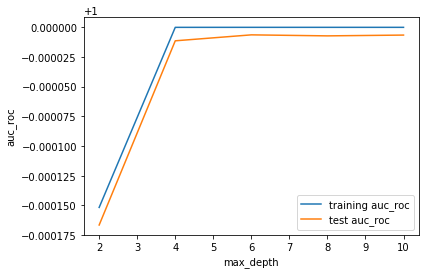

In [60]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("max_depth")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of max_depth, the train scores increases until max_depth=4 and then remains uniform throughout,the test score also however increases until max_depth=4 and then peaks at max_depth=6 then starts to decrease. We can make note of the range and cummulatively tune all the hyperparameters at the end.
- Note that the Y axis might appear on a different scale due to the very close proximity of the scores with 1.00 but they are the same as usual.

##### Tuning subsample
- Note that we would specify an appropriately low value of max_depth, so that the trees do not overfit.

In [61]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {"subsample": [0.3, 0.6, 0.9],
             'max_depth': [2]}

# instantiate the model
xg = XGBClassifier()


# fit tree on training data
xg = GridSearchCV(xg, parameters, 
                    cv=n_folds,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
xg.fit(X_over, y_over)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.1min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [62]:
# cv results
cv_results = pd.DataFrame(xg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.092630,0.041901,0.116778,0.009047,2,0.3,"{'max_depth': 2, 'subsample': 0.3}",0.999846,0.999830,0.999860,0.999803,0.999847,0.999837,0.000020,3,0.999858,0.999853,0.999854,0.999846,0.999835,0.999849,0.000008
1,12.366607,0.135623,0.119679,0.002675,2,0.6,"{'max_depth': 2, 'subsample': 0.6}",0.999846,0.999826,0.999843,0.999818,0.999863,0.999839,0.000016,2,0.999852,0.999839,0.999870,0.999846,0.999859,0.999853,0.000011
2,13.107258,0.031151,0.119446,0.011830,2,0.9,"{'max_depth': 2, 'subsample': 0.9}",0.999854,0.999839,0.999846,0.999837,0.999864,0.999848,0.000010,1,0.999856,0.999858,0.999857,0.999848,0.999862,0.999856,0.000005


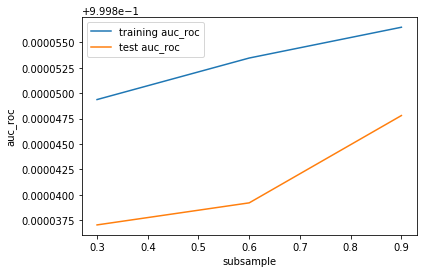

In [67]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_subsample"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_subsample"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("subsample")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of subsample, the train score increases, so does the test score before peaking at a subsample of 0.9.
- Note that the Y axis might appear on a different scale due to the very close proximity of the scores with 1.00 but they are the same as usual.

##### Tuning learning_rate
- Note that we would specify an appropriately low value of max_depth, so that the trees do not overfit.

In [68]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {"learning_rate": [0.2, 0.6, 0.9],
             'max_depth': [2]}

# instantiate the model
xg = XGBClassifier()


# fit tree on training data
xg = GridSearchCV(xg, parameters, 
                    cv=n_folds,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
xg.fit(X_over, y_over)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.8min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [69]:
# cv results
cv_results = pd.DataFrame(xg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.823726,0.193411,0.120887,0.009175,0.2,2,"{'learning_rate': 0.2, 'max_depth': 2}",0.999662,0.999660,0.999723,0.999634,0.999699,0.999676,0.000032,2,0.999670,0.999686,0.999714,0.999662,0.999699,0.999686,0.000019
1,10.808143,0.210910,0.124194,0.002268,0.6,2,"{'learning_rate': 0.6, 'max_depth': 2}",0.999939,0.999952,0.999948,0.999943,0.999933,0.999943,0.000007,1,0.999955,0.999966,0.999967,0.999961,0.999961,0.999962,0.000004
2,10.810186,0.048905,0.125223,0.009906,0.9,2,"{'learning_rate': 0.9, 'max_depth': 2}",0.999982,0.999956,0.999944,0.999964,0.985271,0.997023,0.005876,3,0.999993,0.999985,0.999984,0.999985,0.985783,0.997146,0.005681


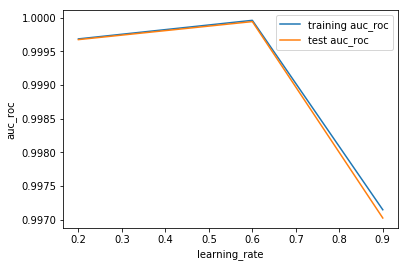

In [70]:
# plotting cv results
plt.figure()
plt.plot(cv_results["param_learning_rate"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_learning_rate"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("learning_rate")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of learning_rate, the train score increases, so does the test score but both of the score decrease after peaking at a learning_rate of 0.6.

####  Grid Search to Find Optimal Hyperparameters
- We can now find the optimal parameters except for the peaked ones for all the hyperparameters using one final grid searchcv.

In [71]:
# Create the parameter grid based on the results of previos search 
param_grid = {
    'max_depth': [6],
    "learning_rate": [0.6],
    "subsample": [0.9]
    
}
# Create a based model
xg = XGBClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xg, param_grid = param_grid, scoring="roc_auc", 
                          cv = 3, n_jobs = -1,verbose = 1)

In [72]:
grid_search.fit(X_over, y_over)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [73]:
# printing the optimal auc score and hyperparameters
print('We can get auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get auc of 0.9999896363980308 using {'learning_rate': 0.6, 'max_depth': 6, 'subsample': 0.9}


- Fitting the final model with the best parameters obtained from grid search.

In [74]:
xg = XGBClassifier(learning_rate=0.6,
                    max_depth=6, 
                    subsample=0.9)
xg.fit(X_over, y_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
# predictions on X_test
from sklearn.metrics import roc_auc_score
y_pred = xg.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.9154877824656241


In [76]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.999602073897218


- We can see that we have an good AUC Score which is our main metric and also good accuracy.

#### The important features of the best model to understand the dataset (From the starter code given)
- The best model for RandomOversampled data in our case is the Random Forest and hence we shall proceed with the same.
- Note that this will not give much explanation on the already transformed dataset, but it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 10
3rd Top var = 12


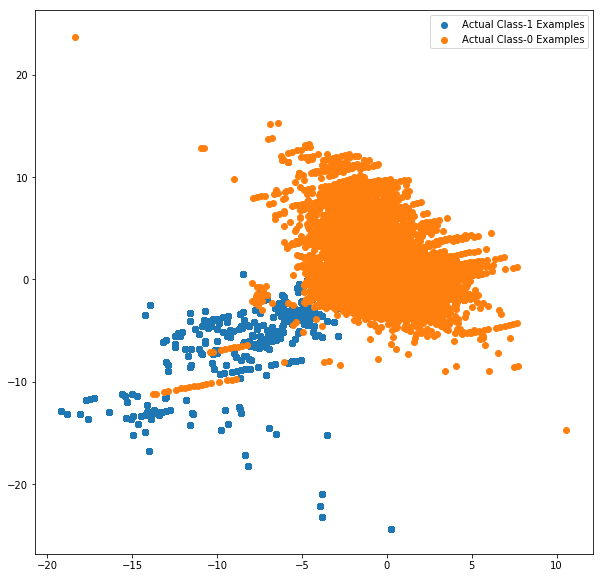

In [77]:
var_imp = []
for i in rfc.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-3])+1)

top_var_index = var_imp.index(np.sort(rfc.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(rfc.feature_importances_)[-2])

X_train_1 = X_over.to_numpy()[np.where(y_over==1.0)]
X_train_0 = X_over.to_numpy()[np.where(y_over==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### ADASYN
- We shall proceed with using ADAptive SYNthetic (ADASYN) oversampling technique as it lowers the bias introduced by the class imbalance and also adaptively shifts the classification decision boundary towards difficult examples.

In [44]:
main_df3.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- To handle the imbalance we first split into test and train sets before trying oversampling techniques. Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow our model to simply memorize specific data points and cause overfitting and poor generalization to the test data.

In [45]:
X=main_df3
y=X.pop('Class')

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.30)

In [47]:
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

- We rescale the data so that all the variables lie on a similar scale. Note that we fit the scale on the Train data and only transform it on the Test Data.

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
converts=['Amount']
X_train[converts] = scaler.fit_transform(X_train[converts])
X_train.head()
X_test[converts] = scaler.transform(X_test[converts])

- Printing the class distribution after applying ADASYN

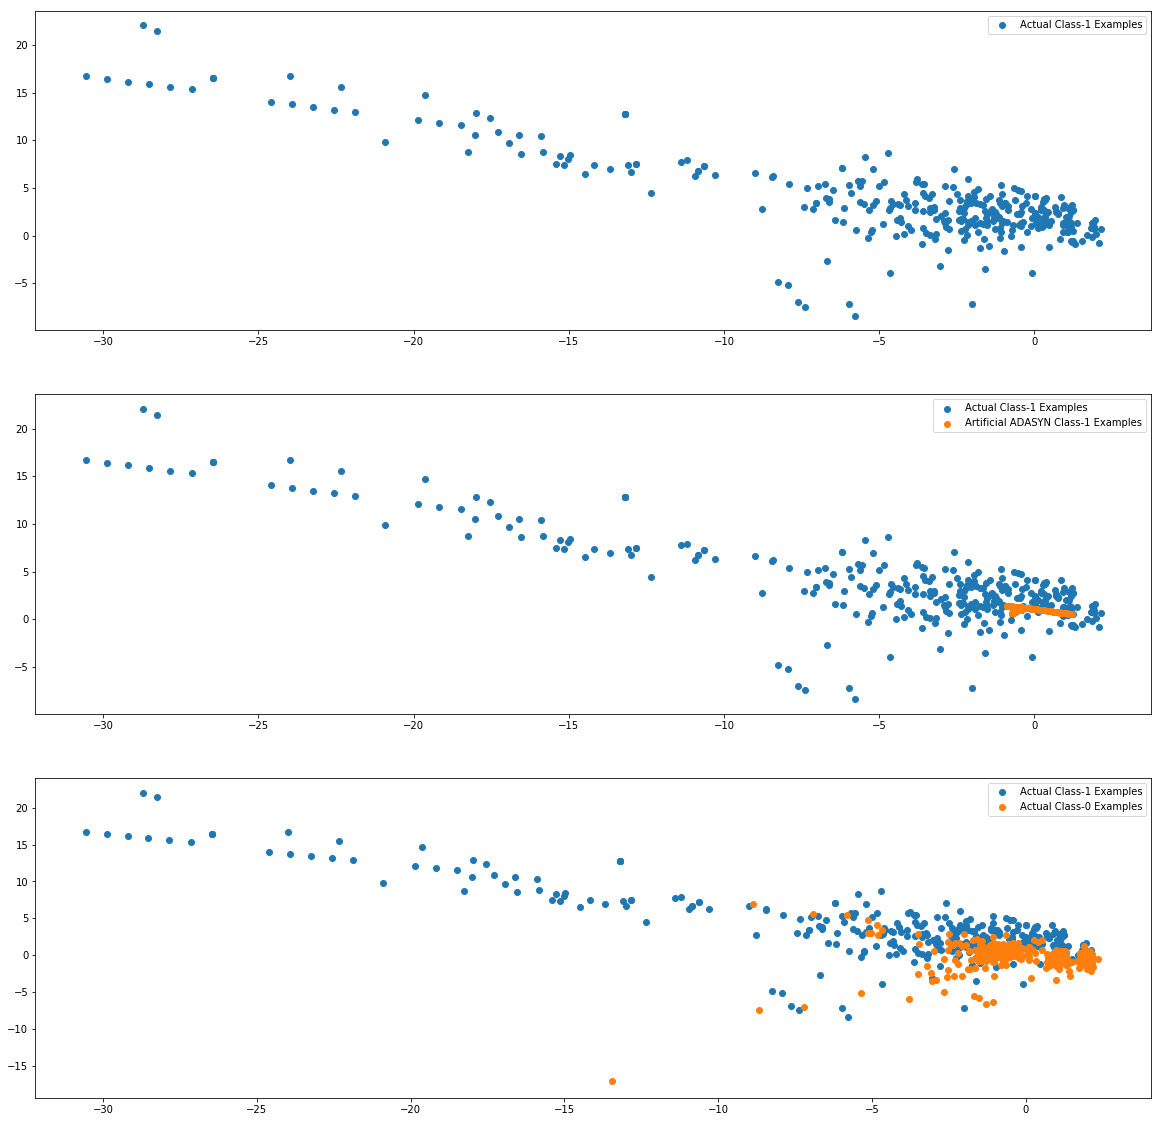

In [49]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [50]:
X_train_adasyn=pd.DataFrame(X_train_adasyn, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
X_train_adasyn.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.864028,-1.915898,2.387372,-1.302592,-0.020379,-0.383669,-0.753062,0.403823,-0.655537,-0.279250,0.266568,-0.182742,-0.541238,-0.726000,-1.899519,1.252161,0.097620,-0.700516,0.687578,0.725025,0.277375,0.139899,0.277707,-0.022786,0.532786,-0.347681,-0.043625,0.088095,0.006447
1,-0.873452,-0.003492,1.894780,-0.600357,-0.353781,0.203216,0.521920,0.105186,-1.056613,-0.230218,-1.995208,-0.698418,-0.315128,-0.335423,-0.679251,-1.231718,-0.348064,1.265009,-0.905383,-0.302030,-0.645087,-1.566793,0.048697,-0.576684,0.410190,-0.671657,0.045193,0.078134,0.004280
2,-0.502716,-0.143660,0.826302,-1.482937,-0.053350,-1.429746,0.342754,-0.440417,-0.688259,0.211647,-0.236325,-1.343123,-0.599901,-1.406945,0.189948,1.648607,0.517332,-1.031068,-0.126911,-0.179110,-0.055944,0.001303,0.547920,0.257261,-1.238443,-0.868140,-0.109062,-0.006850,0.000584
3,1.227696,-0.459974,0.479894,0.375185,-0.393274,0.966991,-0.885717,0.446097,1.105157,-0.014676,-0.937063,-0.555688,-1.831747,0.106841,-0.142094,0.963848,-0.933155,1.084070,0.909535,-0.135009,-0.168097,-0.456324,-0.183465,-1.407178,0.378188,0.411432,-0.005945,-0.002075,0.000973
4,2.046863,-0.037728,-1.090394,0.391705,-0.031235,-1.072416,0.217081,-0.339957,0.454267,0.044599,-0.652396,0.751118,0.666851,0.160193,0.028229,-0.170250,-0.291021,-1.007097,0.094804,-0.177769,-0.277442,-0.643120,0.325648,-0.067224,-0.286245,0.202782,-0.064944,-0.058858,0.000311


In [51]:
y_train_adasyn=pd.Series(y_train_adasyn)

In [52]:
y_train_adasyn.value_counts()

1    199046
0    199020
dtype: int64

In [53]:
X_train_adasyn.shape

(398066, 29)

- We can now see that both the classes have almost equal representation in the train data set. We can hence proceed with our modeling techniques as before.

#### Logistic Regression Model

In [33]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

- Performing Logistic Regression with StratifiedKFold Cross Validation using roc_auc as a scoring metric for 10 folds. Also note that roc_auc considers all the optimal cut off points for logistic regression.Note that we would first be using the default parameters and then be proceeding with the hyperparameter tuning.

In [34]:
logm = LogisticRegression(max_iter=10000)
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(logm, X_train_adasyn, y_train_adasyn, scoring='roc_auc', cv=folds)
scores

array([0.95832506, 0.96112037, 0.96016492, 0.95980399, 0.95948614,
       0.95948434, 0.96067054, 0.95843104, 0.96063273, 0.95995726])

In [35]:
scores.mean()*100,scores.std()*100

(95.98076394342844, 0.08717600061862935)

- We can see that we have a satisfactory roc_auc score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

##### Hyperparameter Tuning
- In logistic regression, we know that the hyperparameter that we can tune is the number of variables is the number of columns or features. We shall hence proceed to tune the hyperparameters using grid search CV.

In [36]:
# number of features in X_train
len(X_train_adasyn.columns)

29

In [38]:
# create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 30, 6))}]


# perform grid search
logm = LogisticRegression(max_iter=10000)
logm.fit(X_train_adasyn, y_train_adasyn)
rfe = RFE(logm)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 12.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LogisticRegression(max_iter=10000)),
             param_grid=[{'n_features_to_select': [1, 7, 13, 19, 25]}],
             return_train_score=True, scoring='roc_auc', verbose=1)

In [39]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,42.657351,1.956383,0.029317,0.005077,1,{'n_features_to_select': 1},0.539848,0.540133,0.540876,0.541741,0.542300,0.540980,0.000931,5,0.541266,0.541197,0.541012,0.540796,0.540656,0.540986,0.000232
1,38.436768,1.992039,0.027854,0.006138,7,{'n_features_to_select': 7},0.938490,0.939776,0.939412,0.941214,0.940434,0.939865,0.000922,4,0.940171,0.940003,0.939927,0.939507,0.939786,0.939879,0.000224
2,32.268291,1.151396,0.040478,0.010082,13,{'n_features_to_select': 13},0.949142,0.950565,0.950446,0.952330,0.951429,0.950782,0.001064,3,0.951164,0.950926,0.950815,0.950396,0.950691,0.950798,0.000254
3,23.384062,0.705005,0.042283,0.009451,19,{'n_features_to_select': 19},0.956001,0.956910,0.956553,0.958135,0.957996,0.957119,0.000827,2,0.957690,0.957027,0.957044,0.956719,0.957233,0.957143,0.000319
4,11.624533,0.565757,0.034367,0.006249,25,{'n_features_to_select': 25},0.958317,0.959490,0.959007,0.960468,0.960242,0.959505,0.000791,1,0.959860,0.959563,0.959555,0.959288,0.959371,0.959528,0.000197


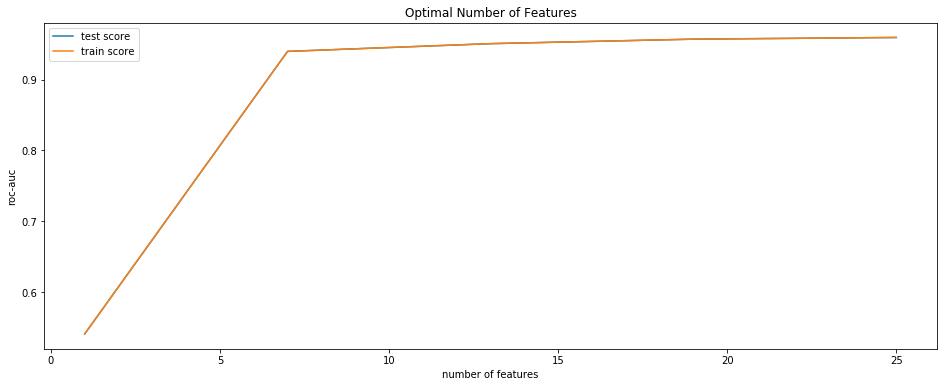

In [40]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('roc-auc')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

- We can see that we have a good test and train auc score post number of features=7 , there is a uniform increase in the test and train scores from the cv_results.To avoid over complexity we shall proceed with n_features_optimal = 10.
- Note that due to ADASYN there will be synthetic samples of the already existing data points and hence the train and test in this case of cross validation will be very similar to each other.
- Now we can proceed with the optimal value of number of features and build a final model.

In [42]:
n_features_optimal = 10

logm = LogisticRegression(max_iter=10000)
logm.fit(X_train_adasyn, y_train_adasyn)

rfe = RFE(logm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train_adasyn, y_train_adasyn)

# predictions on X_test
from sklearn.metrics import roc_auc_score
y_pred = rfe.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.9199862797318686


In [43]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8941165455332795


- We can see that we have a good roc_auc score of 0.91  which is our main metric, from the logistic regression and also a decent accuracy score.

#### Decision Tree
- Performing Decision Tree with StratifiedKFold Cross Validation using roc_auc as a scoring metric for 10 folds.Note that we would first be using the default parameters and then be proceeding with the hyperparameter tuning.

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(dtc, X_train_adasyn, y_train_adasyn, scoring='roc_auc', cv=folds)
scores

array([0.99844245, 0.99844244, 0.99854294, 0.99889463, 0.99859317,
       0.998769  , 0.99876904, 0.99861829, 0.99856809, 0.99891978])

In [70]:
scores.mean()*100,scores.std()*100

(99.86559826303328, 0.0164061823797039)

- We can see that we have a satisfactory roc_auc score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

##### Hyperparameter Tuning
- In decision tree classifier, we know that there are multiple hyperparameters that we can tune. In this model we shall tune for:<br>max_depth(The maximum depth of the tree),<br>min_samples_leaf(The minimum number of samples required to be at a leaf node),<br> and min_samples_split(The minimum number of samples required to split an internal node).

##### Tuning max_depth

In [54]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 7)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)


# fit tree on training data
dt = GridSearchCV(dtree, parameters, 
                    cv=n_folds,
                  n_jobs=-1,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
dt.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   33.9s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 7)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [55]:
# scores of GridSearch CV
cv_results = pd.DataFrame(dt.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.306200,0.171445,0.043391,0.005655,2,{'max_depth': 2},0.882432,0.823633,0.874390,0.915337,0.899769,0.879112,0.031145,3,0.900331,0.901035,0.899667,0.891226,0.893447,0.897141,0.004009
1,16.077395,0.527891,0.038848,0.005734,9,{'max_depth': 9},0.920335,0.878006,0.953736,0.911325,0.940068,0.920694,0.025990,2,0.994351,0.990672,0.990322,0.989647,0.993222,0.991643,0.001816
2,19.708813,2.267478,0.027133,0.000976,16,{'max_depth': 16},0.937415,0.879977,0.957866,0.932199,0.926691,0.926829,0.025688,1,0.998338,0.997975,0.996928,0.996632,0.997967,0.997568,0.000664


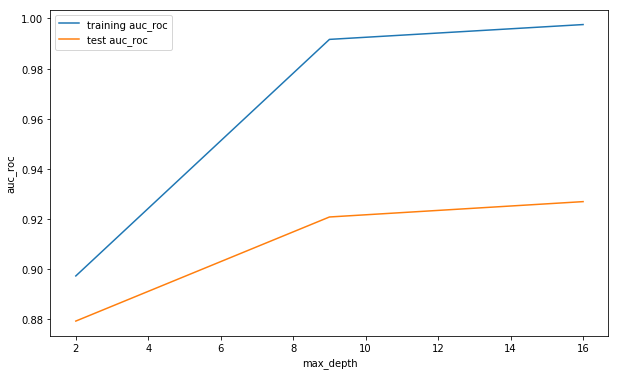

In [56]:
# plotting cv results
plt.figure(figsize=(10,6))
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("max_depth")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of max_depth, both train and test scores increase till max_depth=9 , but after that test score decreases over the increse of max_depth. We shall hence consider max_depth as 16.

##### Tuning min_samples_leaf

In [57]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1000, 4000, 500)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)


# fit tree on training data
dt = GridSearchCV(dtree, parameters, 
                    cv=n_folds,
                  n_jobs=-1,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
dt.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'min_samples_leaf': range(1000, 4000, 500)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [58]:
# scores of GridSearch CV
cv_results = pd.DataFrame(dt.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,21.942124,1.816680,0.046236,0.003735,1000,{'min_samples_leaf': 1000},0.977574,0.941767,0.978811,0.961274,0.965931,0.965071,0.013441,1,0.991747,0.993269,0.992142,0.992642,0.992261,0.992412,0.000515
1,19.341110,1.658517,0.043684,0.000746,1500,{'min_samples_leaf': 1500},0.971646,0.948253,0.977424,0.957708,0.969344,0.964875,0.010497,2,0.988210,0.989089,0.988851,0.988497,0.989081,0.988746,0.000344
2,17.839713,1.012899,0.043484,0.001197,2000,{'min_samples_leaf': 2000},0.953477,0.937042,0.974847,0.954959,0.967233,0.957512,0.012937,3,0.985067,0.987179,0.986805,0.983837,0.986488,0.985875,0.001245
3,17.370493,0.873928,0.046476,0.002863,2500,{'min_samples_leaf': 2500},0.961815,0.929572,0.969171,0.952044,0.966205,0.955762,0.014320,5,0.982711,0.984163,0.984083,0.982397,0.982938,0.983258,0.000727
4,16.596686,1.623842,0.040692,0.006506,3000,{'min_samples_leaf': 3000},0.963447,0.931562,0.970114,0.953330,0.963672,0.956425,0.013542,4,0.980999,0.980613,0.981458,0.980493,0.979797,0.980672,0.000552
5,13.718520,1.049055,0.027728,0.001466,3500,{'min_samples_leaf': 3500},0.961521,0.930200,0.963613,0.959000,0.963260,0.955519,0.012764,6,0.979822,0.979202,0.978355,0.977803,0.977896,0.978616,0.000780


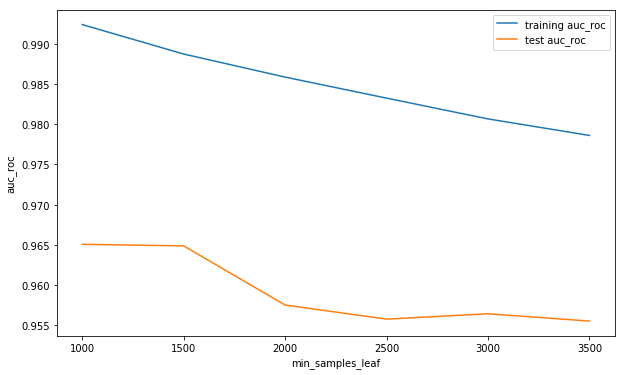

In [59]:
# plotting cv results
plt.figure(figsize=(10,6))
plt.plot(cv_results["param_min_samples_leaf"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_min_samples_leaf"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("min_samples_leaf")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that at min_samples_leaf=1000 the test auc scores and the train auc scores have peaked. We can see a constant drop upon further increasing the min_samples_leaf.

##### Tuning min_samples_split

In [60]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(2000, 5000, 1000)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)


# fit tree on training data
dt = GridSearchCV(dtree, parameters, 
                    cv=n_folds,
                  n_jobs=-1,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
dt.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.2min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'min_samples_split': range(2000, 5000, 1000)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [61]:
# scores of GridSearch CV
cv_results = pd.DataFrame(dt.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,37.155712,2.357438,0.045080,0.000977,2000,{'min_samples_split': 2000},0.945990,0.919848,0.973038,0.921420,0.940727,0.940205,0.019386,3,0.997932,0.998175,0.998450,0.998801,0.997892,0.998250,0.000340
1,36.080845,1.784763,0.042088,0.004653,3000,{'min_samples_split': 3000},0.946565,0.922555,0.974161,0.950279,0.944211,0.947554,0.016447,1,0.996613,0.996295,0.997034,0.996783,0.996825,0.996710,0.000247
2,33.154289,0.979192,0.035104,0.008545,4000,{'min_samples_split': 4000},0.944814,0.919509,0.969083,0.951967,0.944861,0.946047,0.015955,2,0.995413,0.994794,0.994448,0.994118,0.994136,0.994582,0.000483


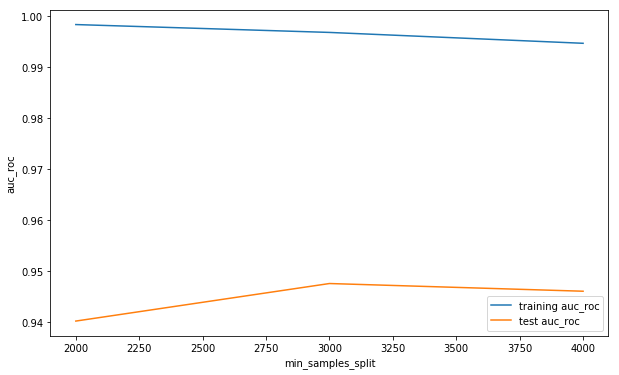

In [62]:
# plotting cv results
plt.figure(figsize=(10,6))
plt.plot(cv_results["param_min_samples_split"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_min_samples_split"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("min_samples_split")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that the auc scores of test peaks at min_samples_split 3000 and train scores slightly drop throughout.

####  Grid Search to Find Optimal Hyperparameters
- We can now find the optimal parameters except for the peaked ones for all the hyperparameters using one final grid searchcv.

In [63]:
from sklearn.tree import DecisionTreeClassifier
# Create the parameter grid based on the results of previos search 
param_grid = {
    'max_depth': [16],
    'min_samples_leaf': [1000],
    'min_samples_split': [3000],
    'criterion': ["entropy", "gini"]
}
# Create a based model
dtree = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, scoring="roc_auc", 
                          cv = 3, n_jobs = -1,verbose = 1)

In [64]:
grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   15.9s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [16],
                         'min_samples_leaf': [1000],
                         'min_samples_split': [3000]},
             scoring='roc_auc', verbose=1)

In [65]:
# printing the optimal auc score and hyperparameters
print('We can get auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get auc of 0.9676943981330641 using {'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 1000, 'min_samples_split': 3000}


- Fitting the final model with the best parameters obtained from grid search.

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=16, 
                                  min_samples_leaf=1000,
                               min_samples_split=3000,
                        )
dtree.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=16, min_samples_leaf=1000,
                       min_samples_split=3000, random_state=100)

In [67]:
# predictions on X_test
from sklearn.metrics import roc_auc_score
y_pred = dtree.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.9104107287426942


In [68]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9490654588439076


- We can see that our main accuracy metric i.e. roc_auc score is 0.91 with a satisfactory accuracy score.

#### Random Forest Model
- Performing Random Forest with StratifiedKFold Cross Validation using roc_auc as a scoring metric for 5 folds.Note that we would first be using the default parameters and then be proceeding with the hyperparameter tuning.

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(rfc, X_train_adasyn, y_train_adasyn, scoring='roc_auc', cv=folds)
scores

array([0.99997292, 0.9999988 , 1.        , 0.99999999, 1.        ])

In [45]:
scores.mean()*100,scores.std()*100

(99.99943420788915, 0.0010719229152366195)

- We can see that we have a satisfactory roc_auc score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

##### Hyperparameter Tuning
- In random forest, we know that there are multiple hyperparameters that we can tune. In this model we shall tune for:<br>max_depth(The maximum depth of the tree),<br>min_samples_leaf(The minimum number of samples required to be at a leaf node),<br>min_samples_split(The minimum number of samples required to split an internal node)<br> and max_features(The number of features to consider when looking for the best split).

##### Tuning max_depth

In [46]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 7)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
rf.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 26.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 7)}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [47]:
# cv results
cv_results = pd.DataFrame(rf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,32.850335,0.302817,0.346957,0.006174,2,{'max_depth': 2},0.938008,0.921088,0.949243,0.907073,0.923233,0.927729,0.014557,3,0.940806,0.941987,0.935243,0.948225,0.944546,0.942161,4.293818e-03
1,113.883501,7.650913,0.574057,0.029329,9,{'max_depth': 9},0.979907,0.994630,0.993940,0.991090,0.990250,0.989963,0.005293,2,0.999521,0.999515,0.999363,0.999373,0.999503,0.999455,7.152519e-05
2,160.358797,0.758648,0.708563,0.007853,16,{'max_depth': 16},0.971287,0.998770,0.998794,0.997099,0.996349,0.992460,0.010629,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.627776e-08


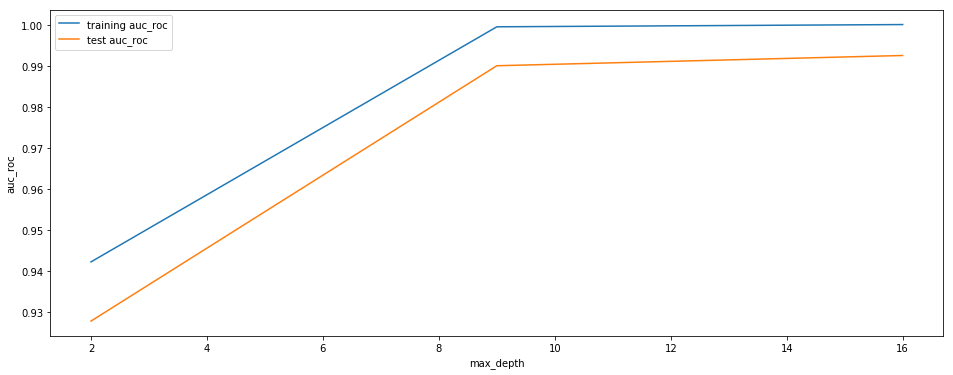

In [49]:
# plotting cv results
plt.figure(figsize=(16,6))
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("max_depth")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of max_depth, both train and test scores increase till max_depth=9 , but after that test score and the train scores remain uniform with very slight increase over the increse of max_depth. We shall hence consider max_depth as 9 to avoid increasing the complexity.

##### Tuning max_features
- Note that we would not be tuning n_estimators due to computational limitations and be using the default n_estimators throughout.
- Note that we would specify an appropriately low value of max_depth, so that the trees do not overfit.

In [34]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [5, 10, 15, 20]}

# instantiate the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  verbose = 1,
                  return_train_score=True,
                   scoring="roc_auc")
rf.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 48.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_features': [5, 10, 15, 20]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [37]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,61.561272,2.547090,0.438636,0.005778,5,{'max_features': 5},0.989477,0.988643,0.910501,0.960801,0.940164,0.957917,0.030040,1,0.969893,0.972553,0.977748,0.972520,0.974817,0.973506,0.002632
1,116.088259,3.978209,0.433360,0.013216,10,{'max_features': 10},0.987790,0.986232,0.907821,0.956852,0.947465,0.957232,0.029366,3,0.968881,0.969794,0.978347,0.973521,0.975085,0.973126,0.003475
2,172.918706,2.499102,0.451388,0.011363,15,{'max_features': 15},0.986631,0.985634,0.910025,0.959462,0.945184,0.957387,0.028459,2,0.968497,0.967602,0.978815,0.974745,0.973712,0.972674,0.004154
3,218.622707,10.853259,0.424426,0.018647,20,{'max_features': 20},0.983214,0.983338,0.906783,0.947741,0.947135,0.953642,0.028388,4,0.965881,0.965465,0.979103,0.972556,0.972297,0.971060,0.005032


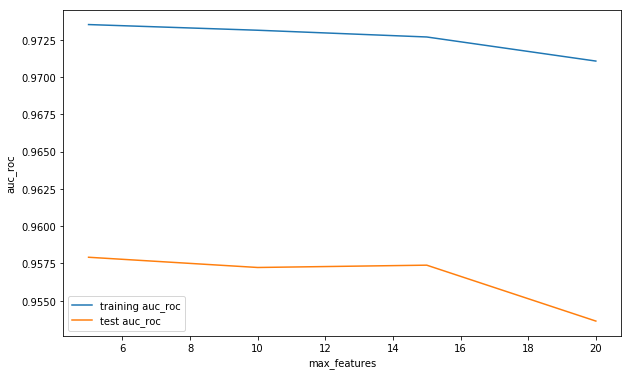

In [38]:
# plotting cv results
plt.figure(figsize=(10,6))
plt.plot(cv_results["param_max_features"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_max_features"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("max_features")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that there is no clear trend in this, however the train and test scores peak at max_features=15 after which the scores reduce.

##### Tuning min_samples_leaf

In [39]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1000, 4000, 500)}

# instantiate the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  verbose=1,
                  n_jobs = -1,
                  return_train_score=True,
                   scoring="roc_auc")
rf.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 12.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': range(1000, 4000, 500)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [40]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,220.527814,4.906700,0.981849,0.018437,1000,{'min_samples_leaf': 1000},0.998106,0.997232,0.974525,0.988614,0.985357,0.988767,0.008641,1,0.998273,0.998081,0.998082,0.998278,0.997860,0.998115,0.000154
1,203.140966,2.108569,1.011511,0.028428,1500,{'min_samples_leaf': 1500},0.997293,0.996283,0.965455,0.984570,0.977812,0.984283,0.011914,2,0.996279,0.996217,0.996315,0.996548,0.995876,0.996247,0.000217
2,193.336160,2.742917,0.964022,0.026368,2000,{'min_samples_leaf': 2000},0.996424,0.995170,0.958784,0.983154,0.974677,0.981642,0.013963,3,0.994675,0.994039,0.994354,0.994904,0.994055,0.994406,0.000341
3,182.902268,2.628504,0.972075,0.027324,2500,{'min_samples_leaf': 2500},0.995944,0.993698,0.949451,0.980326,0.967892,0.977462,0.017260,4,0.992507,0.991756,0.992249,0.993314,0.991950,0.992355,0.000543
4,169.296644,7.166933,0.909657,0.039561,3000,{'min_samples_leaf': 3000},0.994920,0.994202,0.943419,0.976525,0.966064,0.975026,0.019210,5,0.990545,0.990856,0.990705,0.991193,0.990519,0.990764,0.000246
5,148.097765,2.152798,0.778924,0.084633,3500,{'min_samples_leaf': 3500},0.994014,0.992464,0.940619,0.977117,0.959251,0.972693,0.020369,6,0.988488,0.988673,0.989306,0.989841,0.987401,0.988742,0.000824


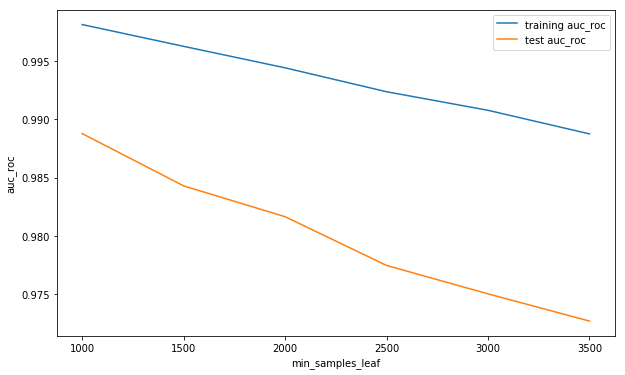

In [42]:
# plotting cv results
plt.figure(figsize=(10,6))
plt.plot(cv_results["param_min_samples_leaf"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_min_samples_leaf"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("min_samples_leaf")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that at min_samples_leaf=1000 the test auc scores and the train auc scores have peaked. We can see a constant drop upon further increasing the min_samples_leaf.

##### Tuning min_samples_split

In [46]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(2000, 5000, 1000)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  verbose=1,
                  n_jobs = -1,
                  return_train_score=True,
                   scoring="roc_auc")
rf.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 10.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_split': range(2000, 5000, 1000)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [47]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,328.862878,6.276211,1.096246,0.026115,2000,{'min_samples_split': 2000},0.993356,0.999081,0.986812,0.997517,0.996319,0.994617,0.004330,1,0.999975,0.999955,0.999919,0.999959,0.999936,0.999949,0.000019
1,318.065106,20.416146,0.995623,0.134972,3000,{'min_samples_split': 3000},0.994185,0.998748,0.980871,0.996803,0.992082,0.992538,0.006258,2,0.999895,0.999817,0.999677,0.999903,0.999753,0.999809,0.000086
2,285.404707,4.120848,0.920938,0.074022,4000,{'min_samples_split': 4000},0.993513,0.998070,0.974850,0.995450,0.991312,0.990639,0.008202,3,0.999707,0.999645,0.999223,0.999724,0.999416,0.999543,0.000194


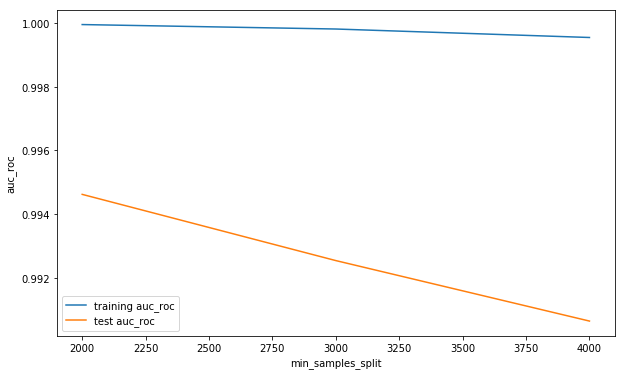

In [49]:
# plotting cv results
plt.figure(figsize=(10,6))
plt.plot(cv_results["param_min_samples_split"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_min_samples_split"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("min_samples_split")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that the auc peaks at min_samples_split=2000 and then falls down as we increase the min_samples_split.

####  Grid Search to Find Optimal Hyperparameters
- We can now find the optimal parameters except for the peaked ones for all the hyperparameters using one final grid searchcv.

In [50]:
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of previos search 
param_grid = {
    'max_depth': [9],
    'min_samples_leaf': [1000],
    'min_samples_split': [2000], 
    'max_features': [15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring="roc_auc", 
                          cv = 3, n_jobs = -1,verbose = 1)

In [51]:
grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.3min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [9], 'max_features': [15],
                         'min_samples_leaf': [1000],
                         'min_samples_split': [2000]},
             scoring='roc_auc', verbose=1)

In [52]:
# printing the optimal auc score and hyperparameters
print('We can get auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get auc of 0.9811759681261193 using {'max_depth': 9, 'max_features': 15, 'min_samples_leaf': 1000, 'min_samples_split': 2000}


- Fitting the final model with the best parameters obtained from grid search.

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=9,
                             min_samples_leaf=1000, 
                             min_samples_split=2000 ,
                             max_features=15)
rfc.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(max_depth=9, max_features=15, min_samples_leaf=1000,
                       min_samples_split=2000)

In [54]:
# predictions on X_test
from sklearn.metrics import roc_auc_score
y_pred = rfc.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.938641606317027


In [55]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9650293177908079


- We can see that the roc_auc score which is our main metric is very good at 0.93 and we have a good accuracy as well.

#### XGBoost Model
- Performing XGBoost with StratifiedKFold Cross Validation using roc_auc as a scoring metric for 5 folds.Note that we would first be using the default parameters and then be proceeding with the hyperparameter tuning.

In [56]:
import xgboost as xgb
from xgboost import XGBClassifier
xg = XGBClassifier()
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(xg, X_train_adasyn, y_train_adasyn, scoring='roc_auc', cv=folds)
scores

array([0.99998936, 0.99998597, 0.99999245, 0.99996949, 1.        ])

In [57]:
scores.mean()*100,scores.std()*100

(99.99874542923642, 0.0010106829942093938)

- We can see that we have a satisfactory roc_auc score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

##### Hyperparameter Tuning
- In XGBoost, we know that there are multiple hyperparameters that we can tune. In this model we shall tune for:<br>max_depth (Maximum depth of a tree),<br>subsample(Subsample ratio of the training instances.),<br>learning_rate(a weighting factor for the corrections by new trees when added to the model.)

##### Tuning max_depth

In [59]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 11, 2)}

# instantiate the model
xg = XGBClassifier()


# fit tree on training data
xg = GridSearchCV(xg, parameters, 
                    cv=n_folds,
                  verbose=1,
                  n_jobs = -1,
                  return_train_score=True,
                   scoring="roc_auc")
xg.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 17.8min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [60]:
# cv results
cv_results = pd.DataFrame(xg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,119.782621,0.805303,0.303310,0.022388,2,{'max_depth': 2},0.992476,0.998195,0.974250,0.992363,0.994187,0.990294,0.008295,5,0.998271,0.998032,0.998623,0.998523,0.998489,0.998388,2.117318e-04
1,237.043371,2.881634,0.464600,0.022779,4,{'max_depth': 4},0.989975,0.999869,0.993746,0.999146,0.999571,0.996461,0.003948,4,0.999990,0.999989,0.999986,0.999978,0.999989,0.999987,4.609113e-06
2,345.445820,3.817119,0.716577,0.025893,6,{'max_depth': 6},0.995296,0.999937,0.999386,0.999762,0.999814,0.998839,0.001781,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.021667e-17
3,410.404727,5.452075,0.798760,0.036870,8,{'max_depth': 8},0.993736,0.999916,0.999394,0.999785,0.999854,0.998537,0.002407,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
4,372.654906,50.977527,0.597592,0.054170,10,{'max_depth': 10},0.997994,0.999896,0.998922,0.999741,0.999835,0.999278,0.000732,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00


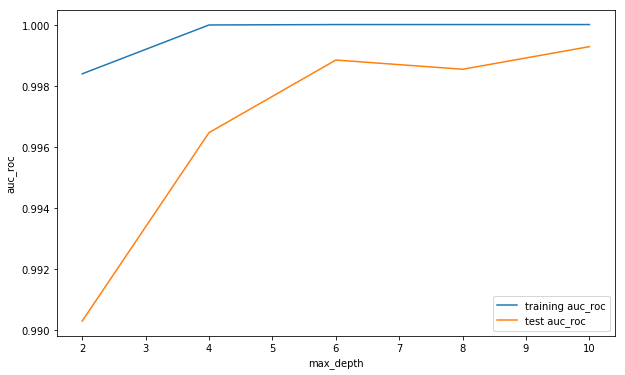

In [61]:
# plotting cv results
plt.figure(figsize=(10,6))
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("max_depth")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of max_depth, the train scores increases until max_depth=4 and then remains uniform throughout,the test score also however increases until max_depth=4 and then peaks at max_depth=10

##### Tuning subsample
- Note that we would specify an appropriately low value of max_depth, so that the trees do not overfit.

In [62]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {"subsample": [0.3, 0.6, 0.9],
             'max_depth': [2]}

# instantiate the model
xg = XGBClassifier()


# fit tree on training data
xg = GridSearchCV(xg, parameters, 
                    cv=n_folds,
                  verbose=1,
                  n_jobs = -1,
                  return_train_score=True,
                   scoring="roc_auc")
xg.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.2min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [63]:
# cv results
cv_results = pd.DataFrame(xg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,76.105308,0.809876,0.273993,0.006444,2,0.3,"{'max_depth': 2, 'subsample': 0.3}",0.993535,0.998495,0.966874,0.990571,0.994259,0.988747,0.011226,3,0.998236,0.998286,0.998687,0.998553,0.998306,0.998414,0.000175
1,96.128857,6.023761,0.256130,0.017308,2,0.6,"{'max_depth': 2, 'subsample': 0.6}",0.990888,0.998263,0.972528,0.992536,0.994239,0.989691,0.008925,2,0.998236,0.998015,0.998613,0.998658,0.998390,0.998382,0.000239
2,92.857046,6.621612,0.174558,0.032294,2,0.9,"{'max_depth': 2, 'subsample': 0.9}",0.990556,0.997895,0.979812,0.992667,0.994073,0.991001,0.006085,1,0.998189,0.997794,0.998628,0.998454,0.998359,0.998285,0.000283


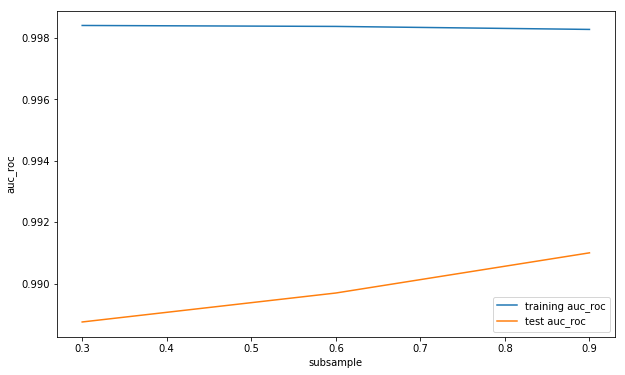

In [65]:
# plotting cv results
plt.figure(figsize=(10,6))
plt.plot(cv_results["param_subsample"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_subsample"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("subsample")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of subsample, the train score increases, so does the test score before peaking at a subsample of 0.9.

##### Tuning learning_rate
- Note that we would specify an appropriately low value of max_depth, so that the trees do not overfit.

In [66]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {"learning_rate": [0.2, 0.6, 0.9],
             'max_depth': [2]}

# instantiate the model
xg = XGBClassifier()


# fit tree on training data
xg = GridSearchCV(xg, parameters, 
                    cv=n_folds,
                  verbose=1,
                  n_jobs = -1,
                  return_train_score=True,
                   scoring="roc_auc")
xg.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.5min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [67]:
# cv results
cv_results = pd.DataFrame(xg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,111.605086,1.515436,0.251973,0.012562,0.2,2,"{'learning_rate': 0.2, 'max_depth': 2}",0.993972,0.996735,0.967069,0.988225,0.988942,0.986989,0.010449,3,0.995881,0.995718,0.997026,0.996794,0.996545,0.996393,0.000510
1,106.394727,7.193497,0.251117,0.030310,0.6,2,"{'learning_rate': 0.6, 'max_depth': 2}",0.989660,0.999128,0.974476,0.996066,0.997778,0.991422,0.009073,2,0.999567,0.999472,0.999631,0.999660,0.999579,0.999582,0.000065
2,97.238311,0.605852,0.180920,0.036531,0.9,2,"{'learning_rate': 0.9, 'max_depth': 2}",0.991151,0.999400,0.984743,0.995710,0.998110,0.993823,0.005341,1,0.999753,0.999706,0.999782,0.999749,0.999788,0.999756,0.000029


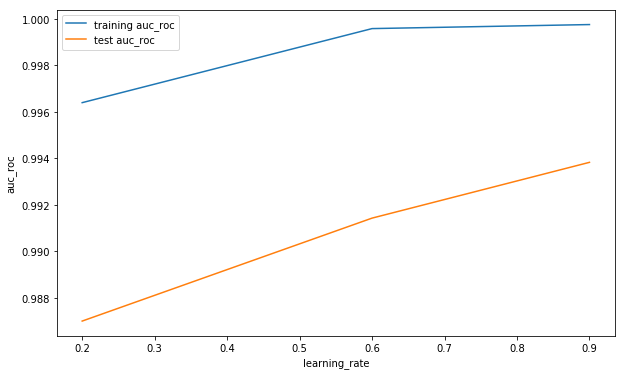

In [68]:
# plotting cv results
plt.figure(figsize=(10,6))
plt.plot(cv_results["param_learning_rate"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_learning_rate"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("learning_rate")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of learning_rate, peaking at a learning_rate of 0.9.

####  Grid Search to Find Optimal Hyperparameters
- We can now find the optimal parameters except for the peaked ones for all the hyperparameters using one final grid searchcv.

In [75]:
# Create the parameter grid based on the results of previos search 
param_grid = {
    'max_depth': [10],
    "learning_rate": [0.9],
    "subsample": [0.9]
    
}
# Create a based model
xg = XGBClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xg, param_grid = param_grid, scoring="roc_auc", 
                          cv = 3, n_jobs = -1,verbose = 1)

In [76]:
grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [77]:
# printing the optimal auc score and hyperparameters
print('We can get auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get auc of 0.9986255166740846 using {'learning_rate': 0.9, 'max_depth': 10, 'subsample': 0.9}


- Fitting the final model with the best parameters obtained from grid search.

In [78]:
xg = XGBClassifier(learning_rate=0.9,
                    max_depth=10, 
                    subsample=0.9)
xg.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.9, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
# predictions on X_test
from sklearn.metrics import roc_auc_score
y_pred = xg.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.9355235724029323


In [80]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.999204147794436


- We can see that we have an good AUC Score which is our main metric and also good accuracy.

#### The important features of the best model to understand the dataset (From the starter code given)
- We can see that Random Forest and XG-Boost both have almost same Test AUC Scores. COnsidering Accuracy also we shall consider XGBoost in this case.
- The best model for Adaptive Synthesized data in our case is the XGBoost and hence we shall proceed with the same.
- Note that this will not give much explanation on the already transformed dataset, but it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 4
3rd Top var = 8


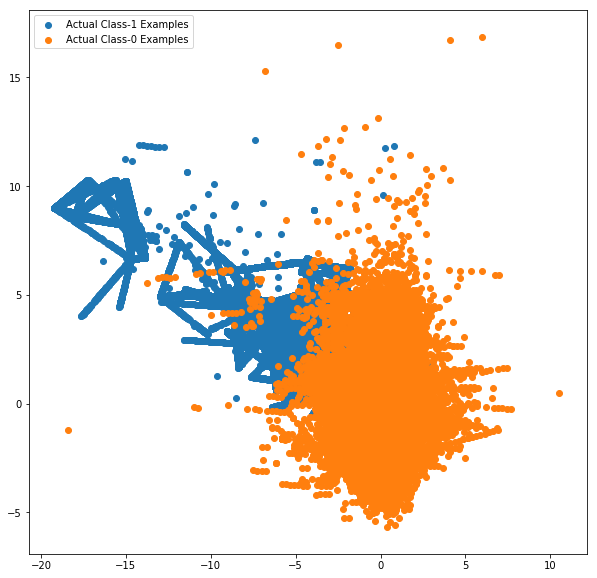

In [81]:
var_imp = []
for i in xg.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xg.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xg.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xg.feature_importances_)[-3])+1)

top_var_index = var_imp.index(np.sort(xg.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xg.feature_importances_)[-2])

X_train_1 = X_train_adasyn.to_numpy()[np.where(y_train_adasyn==1.0)]
X_train_0 = X_train_adasyn.to_numpy()[np.where(y_train_adasyn==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### SMOTE
- Synthetic Minority Over-Sampling Technique (SMOTE): In this process, we can generate new data points, which lie vectorially between two data points that belong to the minority class. These data points are randomly chosen and then assigned to the minority class. This method uses K-nearest neighbours to create random synthetic samples.

In [92]:
main_df4.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- To handle the imbalance we first split into test and train sets before trying oversampling techniques. Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow our model to simply memorize specific data points and cause overfitting and poor generalization to the test data.

In [93]:
X=main_df4
y=X.pop('Class')

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.30)

In [95]:
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

- We rescale the data so that all the variables lie on a similar scale. Note that we fit the scale on the Train data and only transform it on the Test Data.

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
converts=['Amount']
X_train[converts] = scaler.fit_transform(X_train[converts])
X_train.head()
X_test[converts] = scaler.transform(X_test[converts])

- Printing the class distribution after applying SMOTE

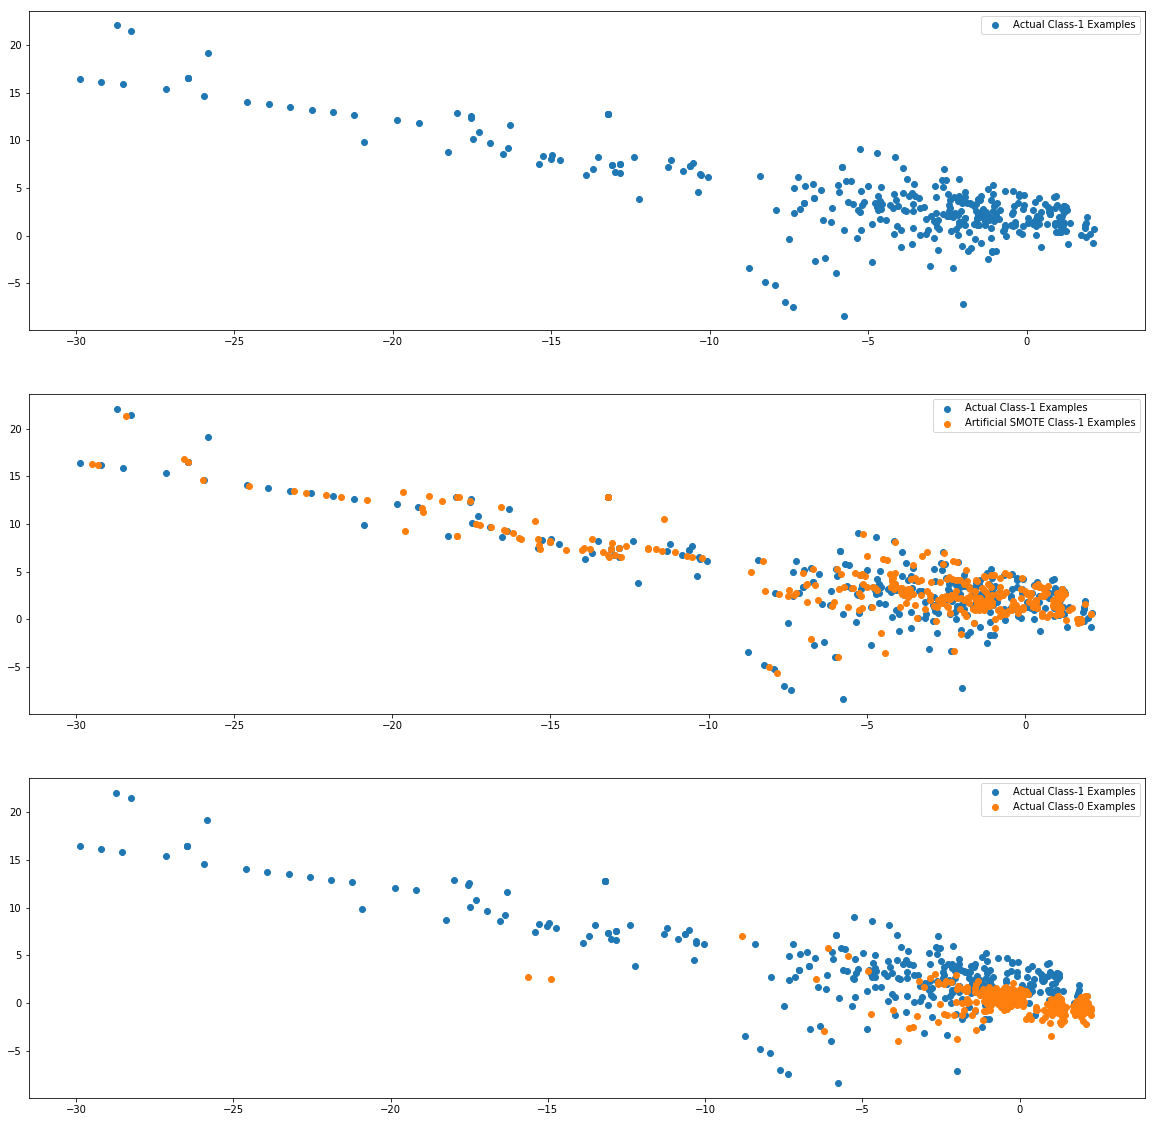

In [97]:
import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [98]:
X_train_smote=pd.DataFrame(X_train_smote, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
X_train_smote.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.588661,2.221802,-2.784580,-1.149483,-1.379208,0.978988,-2.559802,-10.736429,-3.154621,-2.074691,-1.587377,0.487377,-0.924638,2.472001,-1.015417,-1.365081,0.827305,0.820854,-1.603764,1.454286,-5.199621,1.925870,0.192640,0.021424,0.455158,0.977489,-0.066262,-0.220610,0.009925
1,-0.503036,1.558557,0.229284,1.353849,0.763463,-0.482443,0.876200,0.310933,-1.867819,0.194823,0.491130,0.742175,0.522138,0.779487,-1.381801,0.855659,-1.033234,0.176790,-1.083753,-0.290711,0.255940,0.548158,-0.012939,0.011701,-0.719110,-0.275721,0.053043,0.147135,0.000267
2,1.387000,-1.224671,0.989313,-1.369675,-1.988086,-0.577415,-1.376405,0.039619,-1.788494,1.578970,1.328471,-0.364383,-0.016605,-0.191046,0.218091,0.091007,0.210534,0.647244,-0.157542,-0.296045,-0.161622,-0.203394,0.123315,0.495674,0.071299,-0.330069,0.044141,0.027353,0.001421
3,1.313872,0.328257,-0.291373,0.306360,0.568722,0.216932,0.031462,-0.020081,0.005527,-0.347515,-0.962989,0.277065,1.239214,-0.500173,1.361716,0.557399,-0.281031,-0.388082,-0.034062,-0.018269,-0.343473,-0.908457,-0.022990,-1.346924,0.357107,0.208395,-0.003123,0.014764,0.000039
4,-0.041190,0.861948,-0.507516,-0.440759,0.956608,-0.738587,0.941736,-0.106814,0.304173,-0.958716,-1.702953,-0.746337,-0.759428,-1.249935,-0.845613,0.118996,0.569116,0.438801,0.025913,0.001906,0.036222,0.426420,-0.372028,-0.754342,0.155933,0.727972,0.261810,0.117844,0.000448


In [99]:
y_train_smote=pd.Series(y_train_smote)

In [100]:
y_train_smote.value_counts()

1    199020
0    199020
dtype: int64

In [101]:
X_train_smote.shape

(398040, 29)

- We can now see that both the classes have almost equal representation in the train data set. We can hence proceed with our modeling techniques as before.

#### Logistic Regression Model

In [32]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

- Performing Logistic Regression with StratifiedKFold Cross Validation using roc_auc as a scoring metric for 10 folds. Also note that roc_auc considers all the optimal cut off points for logistic regression.Note that we would first be using the default parameters and then be proceeding with the hyperparameter tuning.

In [33]:
logm = LogisticRegression(max_iter=10000)
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(logm, X_train_smote, y_train_smote, scoring='roc_auc', cv=folds)
scores

array([0.98959671, 0.98915078, 0.98948395, 0.98944275, 0.98939863,
       0.98950514, 0.98964977, 0.98898563, 0.9901382 , 0.9895949 ])

In [34]:
scores.mean()*100,scores.std()*100

(98.94946462669594, 0.02912335827032431)

- We can see that we have a satisfactory roc_auc score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

##### Hyperparameter Tuning
- In logistic regression, we know that the hyperparameter that we can tune is the number of variables is the number of columns or features. We shall hence proceed to tune the hyperparameters using grid search CV.

In [35]:
# number of features in X_train
len(X_train_smote.columns)

29

In [36]:
# create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 30, 6))}]


# perform grid search
logm = LogisticRegression(max_iter=10000)
logm.fit(X_train_smote, y_train_smote)
rfe = RFE(logm)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds,
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LogisticRegression(max_iter=10000)),
             n_jobs=-1,
             param_grid=[{'n_features_to_select': [1, 7, 13, 19, 25]}],
             return_train_score=True, scoring='roc_auc', verbose=1)

In [37]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,124.307658,1.477090,0.065303,0.007443,1,{'n_features_to_select': 1},0.492767,0.489512,0.485574,0.486401,0.485881,0.488027,0.002755,5,0.486849,0.487662,0.488644,0.488442,0.488567,0.488033,0.000688
1,115.547751,3.253050,0.079806,0.010367,7,{'n_features_to_select': 7},0.984087,0.984123,0.983922,0.984251,0.984063,0.984089,0.000106,4,0.984111,0.984072,0.984095,0.984063,0.984116,0.984091,0.000021
2,101.121868,2.584374,0.089408,0.009192,13,{'n_features_to_select': 13},0.986552,0.986438,0.986283,0.986470,0.986744,0.986497,0.000151,3,0.986524,0.986547,0.986537,0.986282,0.986729,0.986524,0.000142
3,74.448173,6.025856,0.065567,0.026631,19,{'n_features_to_select': 19},0.988662,0.988483,0.988447,0.988730,0.988602,0.988585,0.000106,2,0.988568,0.988597,0.988525,0.988630,0.988646,0.988593,0.000043
4,41.025530,7.463679,0.107590,0.034357,25,{'n_features_to_select': 25},0.989307,0.989204,0.989177,0.989465,0.989315,0.989294,0.000102,1,0.989283,0.989300,0.989214,0.989372,0.989341,0.989302,0.000054


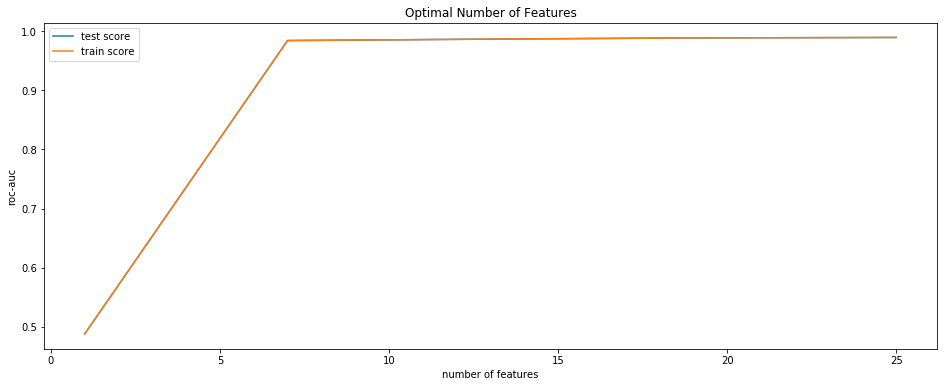

In [38]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('roc-auc')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

- We can see that we have a good test and train auc score post number of features=7 , there is a uniform increase in the test and train scores from the cv_results.To avoid over complexity we shall proceed with n_features_optimal = 10.
- Note that due to SMOTE there will be synthetic samples of the already existing data points and hence the train and test in this case of cross validation will be very similar to each other.
- Now we can proceed with the optimal value of number of features and build a final model.

In [39]:
n_features_optimal = 10

logm = LogisticRegression(max_iter=10000)
logm.fit(X_train_smote, y_train_smote)

rfe = RFE(logm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train_smote, y_train_smote)

# predictions on X_test
from sklearn.metrics import roc_auc_score
y_pred = rfe.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.9365627322028636


In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9743454700794681


- We can see that we have a good roc_auc score of 0.93  which is our main metric, from the logistic regression and also a decent accuracy score.

#### Decision Tree
- Performing Decision Tree with StratifiedKFold Cross Validation using roc_auc as a scoring metric for 10 folds.Note that we would first be using the default parameters and then be proceeding with the hyperparameter tuning.

In [102]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(dtc, X_train_smote, y_train_smote, scoring='roc_auc', cv=folds)
scores

array([0.99841724, 0.99841724, 0.99859311, 0.99834188, 0.99861823,
       0.99829163, 0.99831675, 0.99876897, 0.99824138, 0.99844237])

In [103]:
scores.mean()*100,scores.std()*100

(99.84448799115665, 0.01582755501959646)

- We can see that we have a satisfactory roc_auc score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

##### Hyperparameter Tuning
- In decision tree classifier, we know that there are multiple hyperparameters that we can tune. In this model we shall tune for:<br>max_depth(The maximum depth of the tree),<br>min_samples_leaf(The minimum number of samples required to be at a leaf node),<br> and min_samples_split(The minimum number of samples required to split an internal node).

##### Tuning max_depth

In [104]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 7)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)


# fit tree on training data
dt = GridSearchCV(dtree, parameters, 
                    cv=n_folds,
                  n_jobs=-1,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
dt.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   36.8s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 7)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [105]:
# scores of GridSearch CV
cv_results = pd.DataFrame(dt.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.242163,0.077820,0.043930,0.003922,2,{'max_depth': 2},0.962262,0.961851,0.961281,0.963108,0.962438,0.962188,0.000608,3,0.962327,0.962437,0.962566,0.961979,0.962181,0.962298,0.000204
1,16.615733,0.386037,0.040514,0.004951,9,{'max_depth': 9},0.998004,0.997852,0.997950,0.997855,0.997984,0.997929,0.000064,1,0.998937,0.998801,0.998664,0.998698,0.998766,0.998773,0.000095
2,19.991763,2.128468,0.028918,0.003462,16,{'max_depth': 16},0.997637,0.997905,0.998075,0.997997,0.997971,0.997917,0.000150,2,0.999708,0.999810,0.999729,0.999774,0.999768,0.999758,0.000036


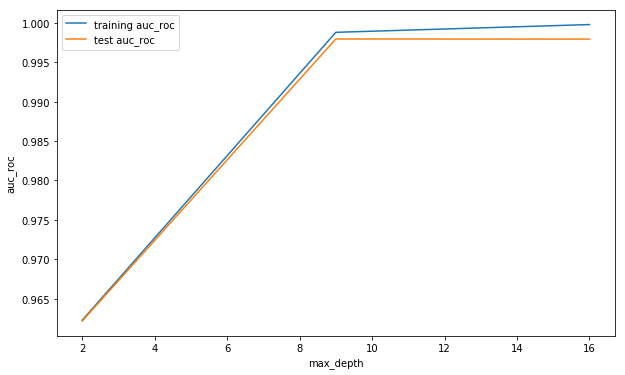

In [106]:
# plotting cv results
plt.figure(figsize=(10,6))
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("max_depth")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of max_depth, both train and test scores increase till max_depth=9 , but after that test score decreases over the increse of max_depth. We shall hence consider max_depth as 9.

##### Tuning min_samples_leaf

In [107]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1000, 4000, 500)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)


# fit tree on training data
dt = GridSearchCV(dtree, parameters, 
                    cv=n_folds,
                  n_jobs=-1,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
dt.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'min_samples_leaf': range(1000, 4000, 500)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [108]:
# scores of GridSearch CV
cv_results = pd.DataFrame(dt.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,19.338352,0.859801,0.042487,0.001354,1000,{'min_samples_leaf': 1000},0.996460,0.996118,0.996138,0.996147,0.996312,0.996235,0.000132,1,0.996636,0.996335,0.996334,0.996421,0.996375,0.996420,0.000112
1,17.819855,0.526108,0.043285,0.001739,1500,{'min_samples_leaf': 1500},0.995282,0.994878,0.994878,0.994865,0.995062,0.994993,0.000162,2,0.995364,0.994963,0.995115,0.995250,0.995083,0.995155,0.000139
2,17.029183,0.413148,0.043884,0.001093,2000,{'min_samples_leaf': 2000},0.993802,0.993791,0.993815,0.993899,0.993945,0.993850,0.000060,3,0.993972,0.993927,0.994094,0.994122,0.993916,0.994006,0.000086
3,16.632664,0.527021,0.042885,0.001092,2500,{'min_samples_leaf': 2500},0.992776,0.992783,0.992634,0.992945,0.993012,0.992830,0.000134,4,0.992925,0.992993,0.993052,0.993002,0.993023,0.992999,0.000042
4,16.051239,0.756799,0.040492,0.006956,3000,{'min_samples_leaf': 3000},0.992192,0.992286,0.992112,0.992466,0.992641,0.992339,0.000192,5,0.992407,0.992436,0.992483,0.992533,0.992486,0.992469,0.000044
5,13.197397,0.384474,0.029920,0.005642,3500,{'min_samples_leaf': 3500},0.991637,0.991706,0.991761,0.992129,0.992264,0.991899,0.000249,6,0.991835,0.991891,0.992182,0.992135,0.992078,0.992024,0.000137


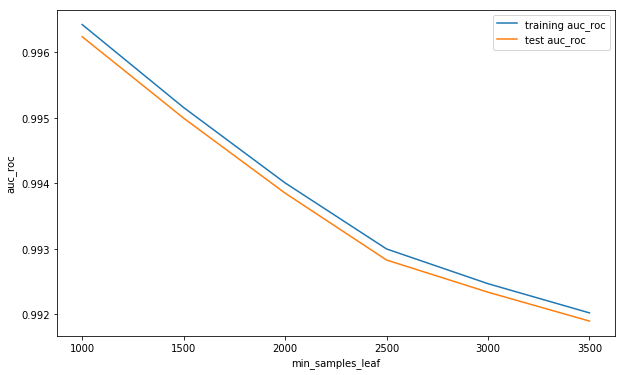

In [109]:
# plotting cv results
plt.figure(figsize=(10,6))
plt.plot(cv_results["param_min_samples_leaf"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_min_samples_leaf"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("min_samples_leaf")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that at min_samples_leaf=1000 the test auc scores and the train auc scores have peaked. We can see a constant drop upon further increasing the min_samples_leaf.

##### Tuning min_samples_split

In [110]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(2000, 5000, 1000)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)


# fit tree on training data
dt = GridSearchCV(dtree, parameters, 
                    cv=n_folds,
                  n_jobs=-1,
                  verbose=1,
                  return_train_score=True,
                   scoring="roc_auc")
dt.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.1min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'min_samples_split': range(2000, 5000, 1000)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [111]:
# scores of GridSearch CV
cv_results = pd.DataFrame(dt.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,32.726878,0.468505,0.044046,0.001520,2000,{'min_samples_split': 2000},0.997517,0.997445,0.997573,0.997368,0.997684,0.997517,0.000108,1,0.998032,0.997994,0.997981,0.998017,0.998013,0.998008,0.000018
1,31.734493,1.111705,0.041689,0.006597,3000,{'min_samples_split': 3000},0.996392,0.996185,0.996457,0.996084,0.996291,0.996282,0.000135,2,0.996771,0.996610,0.996815,0.996746,0.996414,0.996671,0.000146
2,29.965433,0.637546,0.034913,0.005808,4000,{'min_samples_split': 4000},0.995485,0.995277,0.995509,0.995198,0.995192,0.995332,0.000138,3,0.995690,0.995634,0.995819,0.995656,0.995426,0.995645,0.000127


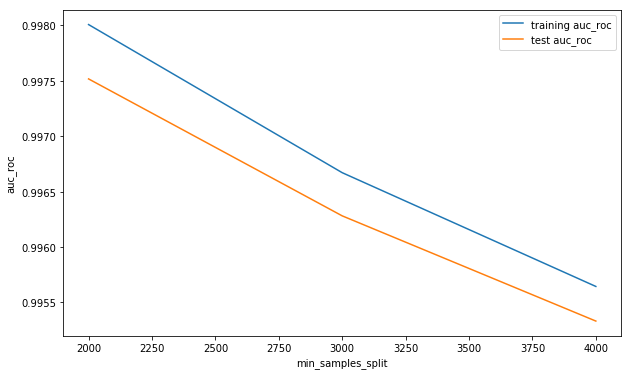

In [112]:
# plotting cv results
plt.figure(figsize=(10,6))
plt.plot(cv_results["param_min_samples_split"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_min_samples_split"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("min_samples_split")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that the auc scores of test peaks at min_samples_split 2000 and train scores slightly drop throughout.

####  Grid Search to Find Optimal Hyperparameters
- We can now find the optimal parameters except for the peaked ones for all the hyperparameters using one final grid searchcv.

In [113]:
from sklearn.tree import DecisionTreeClassifier
# Create the parameter grid based on the results of previos search 
param_grid = {
    'max_depth': [9],
    'min_samples_leaf': [1000],
    'min_samples_split': [2000],
    'criterion': ["entropy", "gini"]
}
# Create a based model
dtree = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, scoring="roc_auc", 
                          cv = 3, n_jobs = -1,verbose = 1)

In [114]:
grid_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   12.0s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [9],
                         'min_samples_leaf': [1000],
                         'min_samples_split': [2000]},
             scoring='roc_auc', verbose=1)

In [115]:
# printing the optimal auc score and hyperparameters
print('We can get auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get auc of 0.996122720845256 using {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1000, 'min_samples_split': 2000}


- Fitting the final model with the best parameters obtained from grid search.

In [116]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=9, 
                                  min_samples_leaf=1000,
                               min_samples_split=2000,
                        )
dtree.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=1000,
                       min_samples_split=2000, random_state=100)

In [117]:
# predictions on X_test
from sklearn.metrics import roc_auc_score
y_pred = dtree.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.9162591514663735


In [118]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9674753929520264


- We can see that our main accuracy metric i.e. roc_auc score is 0.91 with a satisfactory accuracy score.

#### Random Forest Model
- Performing Random Forest with StratifiedKFold Cross Validation using roc_auc as a scoring metric for 5 folds.Note that we would first be using the default parameters and then be proceeding with the hyperparameter tuning.

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(rfc, X_train_smote, y_train_smote, scoring='roc_auc', cv=folds)
scores

array([0.99999835, 0.99998657, 0.99999975, 0.99999913, 0.99999998])

In [42]:
scores.mean()*100,scores.std()*100

(99.99967547115929, 0.0005126038263528955)

- We can see that we have a satisfactory roc_auc score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

##### Hyperparameter Tuning
- In random forest, we know that there are multiple hyperparameters that we can tune. In this model we shall tune for:<br>max_depth(The maximum depth of the tree),<br>min_samples_leaf(The minimum number of samples required to be at a leaf node),<br>min_samples_split(The minimum number of samples required to split an internal node)<br> and max_features(The number of features to consider when looking for the best split).

##### Tuning max_depth

In [43]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 7)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  verbose=1,
                  n_jobs = -1,
                  return_train_score=True,
                   scoring="roc_auc")
rf.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  8.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 7)}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [44]:
# cv results
cv_results = pd.DataFrame(rf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,63.663925,0.444883,0.774659,0.054871,2,{'max_depth': 2},0.970678,0.972296,0.972618,0.971037,0.970821,0.971490,0.000804,3,0.970408,0.972913,0.972251,0.971202,0.971067,0.971568,8.951594e-04
1,233.364737,4.084839,0.910651,0.037105,9,{'max_depth': 9},0.999536,0.999494,0.999598,0.999618,0.999560,0.999561,0.000044,2,0.999606,0.999637,0.999676,0.999627,0.999591,0.999628,2.926259e-05
2,275.851678,35.407283,0.895355,0.070441,16,{'max_depth': 16},0.999995,0.999957,0.999990,1.000000,1.000000,0.999989,0.000016,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.253313e-08


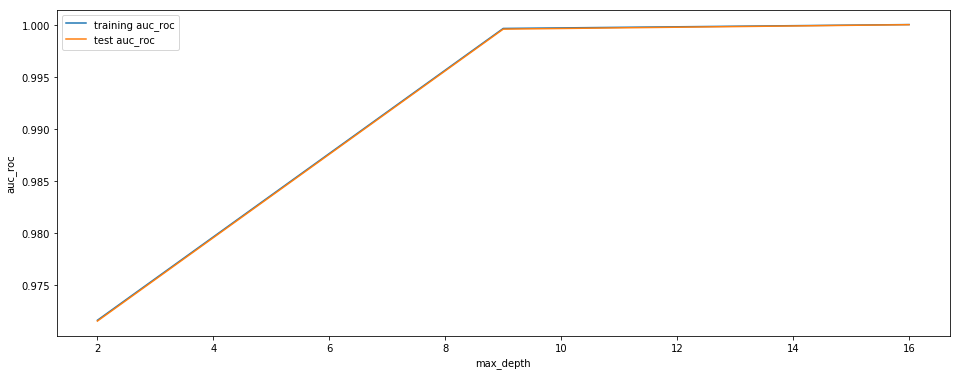

In [45]:
# plotting cv results
plt.figure(figsize=(16,6))
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("max_depth")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of max_depth, both train and test scores increase till max_depth=9 , but after that test score and the train scores remain uniform with very slight increase over the increse of max_depth. We shall hence consider max_depth as 9 to avoid increasing the complexity.

##### Tuning max_features
- Note that we would not be tuning n_estimators due to computational limitations and be using the default n_estimators throughout.
- Note that we would specify an appropriately low value of max_depth, so that the trees do not overfit.

In [46]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [5, 10, 15, 20]}

# instantiate the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  verbose = 1,
                  n_jobs = -1,
                  return_train_score=True,
                   scoring="roc_auc")
rf.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 12.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4), n_jobs=-1,
             param_grid={'max_features': [5, 10, 15, 20]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [47]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,109.537805,0.826305,0.779118,0.049524,5,{'max_features': 5},0.988588,0.988161,0.987953,0.988229,0.988821,0.988350,0.000312,4,0.988414,0.988456,0.988203,0.988537,0.988484,0.988418,0.000115
1,209.430866,1.437790,0.735477,0.030238,10,{'max_features': 10},0.989400,0.989170,0.989324,0.988251,0.989442,0.989117,0.000443,3,0.989288,0.989588,0.989510,0.988562,0.989137,0.989217,0.000364
2,302.609040,5.205602,0.700901,0.057095,15,{'max_features': 15},0.989849,0.988874,0.989715,0.989180,0.989980,0.989519,0.000422,1,0.989658,0.989301,0.989881,0.989505,0.989788,0.989627,0.000206
3,321.477288,30.758754,0.455588,0.041603,20,{'max_features': 20},0.989793,0.988992,0.989415,0.988821,0.989972,0.989399,0.000443,2,0.989466,0.989444,0.989521,0.989330,0.989676,0.989488,0.000113


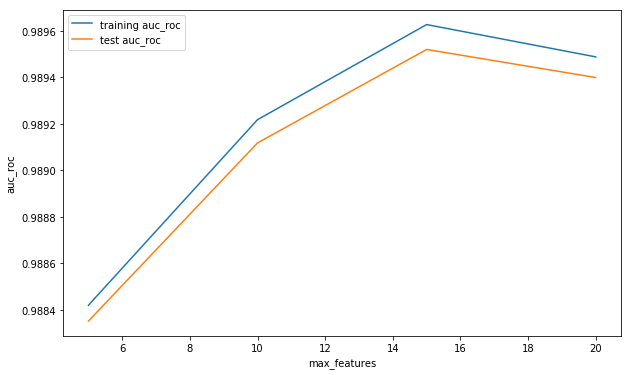

In [48]:
# plotting cv results
plt.figure(figsize=(10,6))
plt.plot(cv_results["param_max_features"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_max_features"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("max_features")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that there is no clear trend in this, however the train and test scores peak at max_features=15 after which the scores reduce.

##### Tuning min_samples_leaf

In [49]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1000, 4000, 500)}

# instantiate the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  verbose=1,
                  n_jobs = -1,
                  return_train_score=True,
                   scoring="roc_auc")
rf.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 13.4min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': range(1000, 4000, 500)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [50]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,230.702601,4.117141,0.975003,0.030876,1000,{'min_samples_leaf': 1000},0.998243,0.998175,0.998213,0.998309,0.998367,0.998261,0.000069,1,0.998239,0.998334,0.998317,0.998400,0.998353,0.998329,0.000053
1,216.433584,8.341400,0.980691,0.043456,1500,{'min_samples_leaf': 1500},0.997003,0.997016,0.996773,0.996854,0.997107,0.996951,0.000120,2,0.996963,0.997195,0.996923,0.997030,0.997058,0.997034,0.000094
2,213.588071,4.011673,0.986563,0.053502,2000,{'min_samples_leaf': 2000},0.995775,0.995609,0.995481,0.995723,0.995832,0.995684,0.000125,3,0.995731,0.995819,0.995672,0.995968,0.995751,0.995788,0.000101
3,198.626421,4.662547,0.949495,0.049448,2500,{'min_samples_leaf': 2500},0.994701,0.994561,0.994542,0.994241,0.994704,0.994550,0.000169,4,0.994594,0.994784,0.994750,0.994520,0.994595,0.994648,0.000101
4,181.683928,9.706985,0.905124,0.033736,3000,{'min_samples_leaf': 3000},0.993932,0.993278,0.993270,0.993386,0.993718,0.993517,0.000264,5,0.993804,0.993553,0.993478,0.993720,0.993540,0.993619,0.000123
5,152.793027,1.080399,0.794689,0.046248,3500,{'min_samples_leaf': 3500},0.992735,0.992267,0.992311,0.992411,0.992870,0.992519,0.000240,6,0.992605,0.992536,0.992490,0.992797,0.992663,0.992618,0.000107


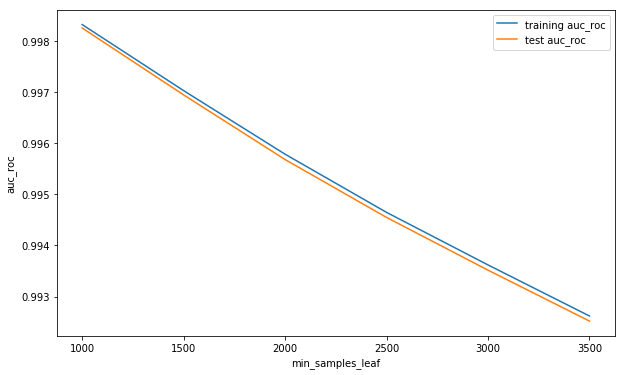

In [51]:
# plotting cv results
plt.figure(figsize=(10,6))
plt.plot(cv_results["param_min_samples_leaf"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_min_samples_leaf"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("min_samples_leaf")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that at min_samples_leaf=1000 the test auc scores and the train auc scores have peaked. We can see a constant drop upon further increasing the min_samples_leaf.

##### Tuning min_samples_split

In [52]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(2000, 5000, 1000)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  verbose=1,
                  n_jobs = -1,
                  return_train_score=True,
                   scoring="roc_auc")
rf.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 10.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_split': range(2000, 5000, 1000)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [53]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,315.097152,3.917002,1.086874,0.039148,2000,{'min_samples_split': 2000},0.999584,0.999504,0.999553,0.999558,0.999563,0.999552,0.000027,1,0.999623,0.999614,0.999643,0.999588,0.999620,0.999617,0.000018
1,301.769217,9.315774,1.026965,0.065767,3000,{'min_samples_split': 3000},0.998848,0.998584,0.998708,0.998931,0.998806,0.998775,0.000120,2,0.998885,0.998787,0.998835,0.999012,0.998858,0.998875,0.000075
2,284.698344,4.347893,0.875802,0.100195,4000,{'min_samples_split': 4000},0.997963,0.997838,0.997833,0.997895,0.998021,0.997910,0.000073,3,0.997984,0.998064,0.997991,0.998051,0.998048,0.998028,0.000033


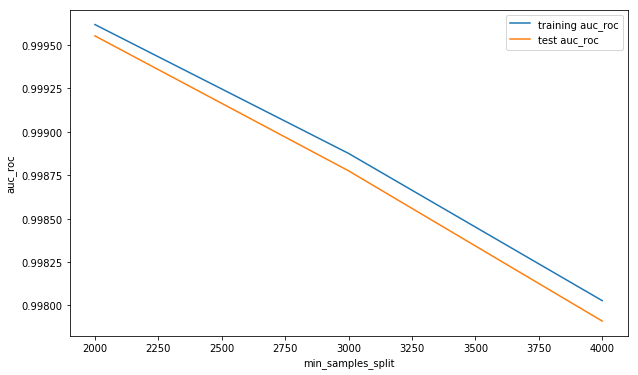

In [54]:
# plotting cv results
plt.figure(figsize=(10,6))
plt.plot(cv_results["param_min_samples_split"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_min_samples_split"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("min_samples_split")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that the auc peaks at min_samples_split=2000 and then falls down as we increase the min_samples_split.

####  Grid Search to Find Optimal Hyperparameters
- We can now find the optimal parameters except for the peaked ones for all the hyperparameters using one final grid searchcv.

In [55]:
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of previos search 
param_grid = {
    'max_depth': [9],
    'min_samples_leaf': [1000],
    'min_samples_split': [2000], 
    'max_features': [15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring="roc_auc", 
                          cv = 3, n_jobs = -1,verbose = 1)

In [56]:
grid_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.8min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [9], 'max_features': [15],
                         'min_samples_leaf': [1000],
                         'min_samples_split': [2000]},
             scoring='roc_auc', verbose=1)

In [57]:
# printing the optimal auc score and hyperparameters
print('We can get auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get auc of 0.9972818877619418 using {'max_depth': 9, 'max_features': 15, 'min_samples_leaf': 1000, 'min_samples_split': 2000}


- Fitting the final model with the best parameters obtained from grid search.

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=9,
                             min_samples_leaf=1000, 
                             min_samples_split=2000 ,
                             max_features=15)
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=9, max_features=15, min_samples_leaf=1000,
                       min_samples_split=2000)

In [59]:
# predictions on X_test
from sklearn.metrics import roc_auc_score
y_pred = rfc.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.9342885502302819


In [60]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9900050325948293


- We can see that the roc_auc score which is our main metric is very good at 0.93 and we have a good accuracy as well.

#### XGBoost Model
- Performing XGBoost with StratifiedKFold Cross Validation using roc_auc as a scoring metric for 5 folds.Note that we would first be using the default parameters and then be proceeding with the hyperparameter tuning.

In [61]:
import xgboost as xgb
from xgboost import XGBClassifier
xg = XGBClassifier()
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(xg, X_train_smote, y_train_smote, scoring='roc_auc', cv=folds)
scores

array([0.99998934, 0.99998694, 0.99999972, 0.9999818 , 0.99999999])

In [63]:
scores.mean()*100,scores.std()*100

(99.99915586019773, 0.0007200580875577864)

- We can see that we have a satisfactory roc_auc score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

##### Hyperparameter Tuning
- In XGBoost, we know that there are multiple hyperparameters that we can tune. In this model we shall tune for:<br>max_depth (Maximum depth of a tree),<br>subsample(Subsample ratio of the training instances.),<br>learning_rate(a weighting factor for the corrections by new trees when added to the model.)

##### Tuning max_depth

In [64]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 11, 2)}

# instantiate the model
xg = XGBClassifier()


# fit tree on training data
xg = GridSearchCV(xg, parameters, 
                    cv=n_folds,
                  verbose=1,
                  n_jobs = -1,
                  return_train_score=True,
                   scoring="roc_auc")
xg.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 17.7min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [65]:
# cv results
cv_results = pd.DataFrame(xg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,121.626202,2.748859,0.302864,0.007547,2,{'max_depth': 2},0.999532,0.999513,0.999538,0.999547,0.999586,0.999543,0.000024,5,0.999572,0.999626,0.999583,0.999587,0.999553,0.999584,2.416479e-05
1,235.930713,5.762376,0.511163,0.029508,4,{'max_depth': 4},0.999962,0.999935,0.999943,0.999997,0.999992,0.999966,0.000025,4,0.999992,0.999993,0.999994,0.999995,0.999995,0.999994,1.148138e-06
2,343.596068,4.634826,0.761031,0.016199,6,{'max_depth': 6},1.000000,0.999961,0.999958,0.999998,0.999999,0.999983,0.000019,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.965068e-17
3,419.694671,4.936584,0.845822,0.067790,8,{'max_depth': 8},1.000000,0.999967,0.999960,1.000000,1.000000,0.999985,0.000018,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
4,373.724077,52.578940,0.557620,0.072234,10,{'max_depth': 10},1.000000,0.999972,0.999941,1.000000,1.000000,0.999983,0.000023,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00


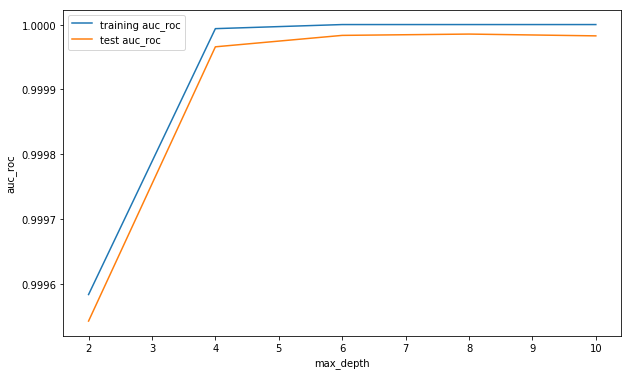

In [66]:
# plotting cv results
plt.figure(figsize=(10,6))
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("max_depth")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of max_depth, the train scores increases until max_depth=4 and then remains uniform throughout,the test score also however increases until max_depth=4 and then peaks at max_depth=8

##### Tuning subsample
- Note that we would specify an appropriately low value of max_depth, so that the trees do not overfit.

In [67]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {"subsample": [0.3, 0.6, 0.9],
             'max_depth': [2]}

# instantiate the model
xg = XGBClassifier()


# fit tree on training data
xg = GridSearchCV(xg, parameters, 
                    cv=n_folds,
                  verbose=1,
                  n_jobs = -1,
                  return_train_score=True,
                   scoring="roc_auc")
xg.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.7min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [68]:
# cv results
cv_results = pd.DataFrame(xg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,91.299774,1.049404,0.301997,0.016837,2,0.3,"{'max_depth': 2, 'subsample': 0.3}",0.999530,0.999447,0.999550,0.999568,0.999568,0.999533,0.000045,3,0.999584,0.999546,0.999586,0.999574,0.999543,0.999567,0.000019
1,108.913366,7.816924,0.324399,0.023878,2,0.6,"{'max_depth': 2, 'subsample': 0.6}",0.999571,0.999523,0.999496,0.999533,0.999550,0.999535,0.000025,2,0.999627,0.999612,0.999556,0.999551,0.999530,0.999575,0.000037
2,107.045225,5.981406,0.203974,0.025746,2,0.9,"{'max_depth': 2, 'subsample': 0.9}",0.999539,0.999460,0.999545,0.999571,0.999573,0.999537,0.000041,1,0.999604,0.999593,0.999571,0.999593,0.999555,0.999583,0.000018


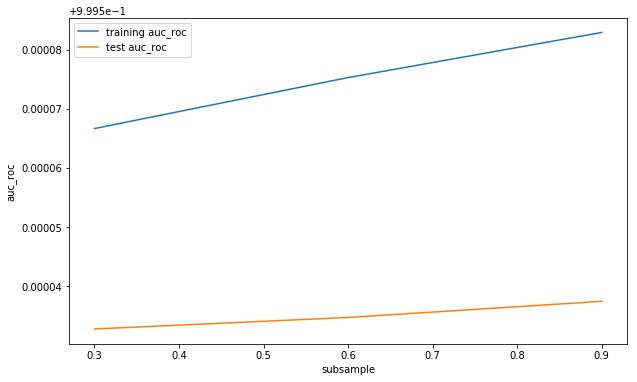

In [69]:
# plotting cv results
plt.figure(figsize=(10,6))
plt.plot(cv_results["param_subsample"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_subsample"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("subsample")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of subsample, the train score increases, so does the test score before peaking at a subsample of 0.9.

##### Tuning learning_rate
- Note that we would specify an appropriately low value of max_depth, so that the trees do not overfit.

In [70]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {"learning_rate": [0.2, 0.6, 0.9],
             'max_depth': [2]}

# instantiate the model
xg = XGBClassifier()


# fit tree on training data
xg = GridSearchCV(xg, parameters, 
                    cv=n_folds,
                  verbose=1,
                  n_jobs = -1,
                  return_train_score=True,
                   scoring="roc_auc")
xg.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.0min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [71]:
# cv results
cv_results = pd.DataFrame(xg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,128.203062,1.220146,0.301167,0.008869,0.2,2,"{'learning_rate': 0.2, 'max_depth': 2}",0.999146,0.998937,0.998913,0.998923,0.999060,0.998996,0.000092,3,0.999193,0.999080,0.998991,0.999016,0.999055,0.999067,0.000070
1,120.382094,8.991669,0.280376,0.042094,0.6,2,"{'learning_rate': 0.6, 'max_depth': 2}",0.999838,0.999824,0.999841,0.999883,0.999874,0.999852,0.000023,2,0.999883,0.999886,0.999885,0.999882,0.999872,0.999882,0.000005
2,109.644854,1.063865,0.206880,0.023545,0.9,2,"{'learning_rate': 0.9, 'max_depth': 2}",0.999874,0.999864,0.999841,0.999952,0.999940,0.999894,0.000044,1,0.999944,0.999935,0.999921,0.999937,0.999939,0.999935,0.000008


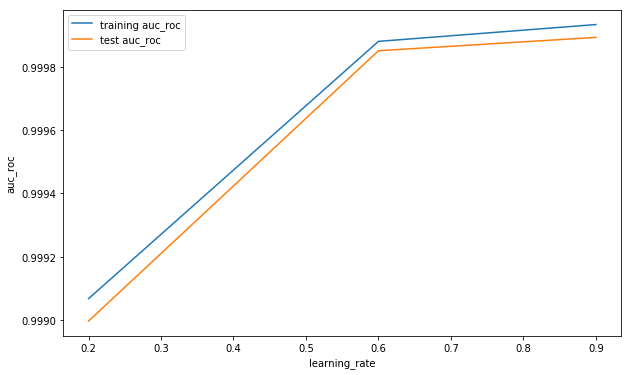

In [72]:
# plotting cv results
plt.figure(figsize=(10,6))
plt.plot(cv_results["param_learning_rate"], 
         cv_results["mean_train_score"], 
         label="training auc_roc")
plt.plot(cv_results["param_learning_rate"], 
         cv_results["mean_test_score"], 
         label="test auc_roc")
plt.xlabel("learning_rate")
plt.ylabel("auc_roc")
plt.legend()
plt.show()

- We can see that as we increase the value of learning_rate, peaking at a learning_rate of 0.9.

####  Grid Search to Find Optimal Hyperparameters
- We can now find the optimal parameters except for the peaked ones for all the hyperparameters using one final grid searchcv.

In [73]:
# Create the parameter grid based on the results of previos search 
param_grid = {
    'max_depth': [8],
    "learning_rate": [0.9],
    "subsample": [0.9]
    
}
# Create a based model
xg = XGBClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xg, param_grid = param_grid, scoring="roc_auc", 
                          cv = 3, n_jobs = -1,verbose = 1)

In [74]:
grid_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [75]:
# printing the optimal auc score and hyperparameters
print('We can get auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get auc of 0.999979605599545 using {'learning_rate': 0.9, 'max_depth': 8, 'subsample': 0.9}


- Fitting the final model with the best parameters obtained from grid search.

In [76]:
xg = XGBClassifier(learning_rate=0.9,
                    max_depth=8, 
                    subsample=0.9)
xg.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.9, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
# predictions on X_test
from sklearn.metrics import roc_auc_score
y_pred = xg.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.9018218567356852


In [78]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9992509626300574


- We can see that we have an good AUC Score which is our main metric and also good accuracy.

#### The important features of the best model to understand the dataset (From the starter code given)
- We can see that Random Forest and Logistic Regression both have almost same Test AUC Scores. Considering Accuracy also we shall consider XGBoost in this case.
- The best model for SMOTE Synthasized data in our case is the XGBoost and hence we shall proceed with the same.
- Note that this will not give much explanation on the already transformed dataset, but it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 10
3rd Top var = 4


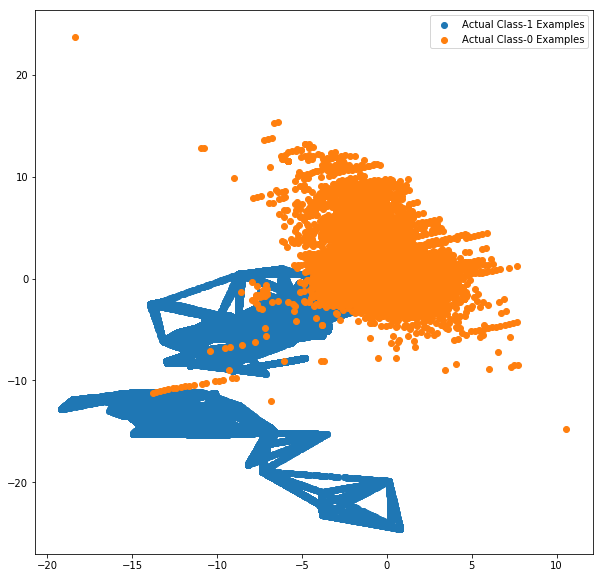

In [79]:
var_imp = []
for i in rfc.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-3])+1)

top_var_index = var_imp.index(np.sort(rfc.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(rfc.feature_importances_)[-2])

X_train_1 = X_train_smote.to_numpy()[np.where(y_train_smote==1.0)]
X_train_0 = X_train_smote.to_numpy()[np.where(y_train_smote==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Results and Insights
- We can observe the following Test AUC Scores from the above models.

In [69]:
data = {'Imbalanced Data':[0.8512, 0.88, 0.5, 0.90], 'Random Oversampling':[0.94, 0.88, 0.95, 0.91], 
        'ADASYN':[0.92, 0.91, 0.93, 0.94], 'SMOTE':[0.93, 0.91, 0.93, 0.90]} 
result = pd.DataFrame(data, index =['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'])
result

,Imbalanced Data,Random Oversampling,ADASYN,SMOTE
Logistic Regression,0.8512,0.94,0.92,0.93
Decision Tree,0.8800,0.88,0.91,0.91
Random Forest,0.5000,0.95,0.93,0.93
XGBoost,0.9000,0.91,0.94,0.90


- We can see that in the Imbalanced Data, the best performing model in our case is XGBoost with variable numbers 17, 14 and 10 being the most important features.
- We can see that in the Random Oversampled Data, the best performing model in our case is Random Forest Classifier with variable numbers 14, 10 and 12 being the most important features.
- We can see that in the ADASYN applied Data, the best performing model in our case is XGBoost with variable numbers 14, 4 and 8 being the most important features.
- We can see that in the SMOTE applied Data, the best performing model in our case is Random Forest Classifier with variable numbers 14, 10 and 4 being the most important features.
- We can also derive from each of the above results that variable number 14 is one of the most important features followed by variable number 10 and the variable number 8 based on their position frequecy of occurence in the results.
<br>
<br>
- We can see that if we consider just the Test AUC Score as our primary metric, Random Forest Classifier on the Random Oversampled data gives us the best score.
- However, if we take note of how Random Oversampler works by simply creating copies of the already existing data, we might want to switch over to oversampling by artificially synthesizing data. In this case, XGBoost on ADASYN applied Data performs equally good.
- Another point that we might take note of is the performance of XGBoost that is consisent throughout no matter what kind of data whether balanced or imbalanced is fed to it. This assures that in generic cases or in other data analyssis, it would be helpful in widely putting XGBoost to use at the primary level. Although accuracy is not our primary metric we can see that the accuracy scores of XGBoost across all the data is 0.999.

##### Note that the test, train auc and accuracy scores may slightly vary if the test train splits are re-run but it would affect our final insights much.